# **Student ID: ST20273663                                                    Student Name: MANISHA.**


# **Research Methods for Technology Dissertations**


# **Evaluating Prediction Methods for Diabetes Onset: A Comparative Study of Accuracy**

Importing essential libraries for Google Colab: `drive` for accessing Google Drive, `os` for file and directory management, and `pandas as pd` for data manipulation and analysis. The command `drive.mount('/content/drive')` is used to mount the Google Drive to the Colab environment at the specified directory (`/content/drive`), which allows to access and work with files stored in the Google Drive from within the Colab notebook.

In [1]:
from google.colab import drive
import os
import pandas as pd

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir('/content/drive/My Drive')

The command `!pip install dash plotly pandas numpy` installs the Dash framework, Plotly for interactive graphs, and Pandas and NumPy for data manipulation and numerical operations.

In [4]:
#import modules
!pip install dash plotly pandas numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 15.6 MB/s eta 0:00:00


Importing necessary libraries

In [5]:
#import modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

The code loads a CSV file named `'NDA Young People with Type 2 Diabetes 2021-22 - Open Data v1.0.csv'` into a Pandas DataFrame named `df` for data manipulation and analysis.

In [6]:
# Load the dataset
file_path = 'NDA Young People with Type 2 Diabetes 2021-22 - Open Data v1.0.csv'
df = pd.read_csv(file_path)

After loading the data into the DataFrame, we will now proceed with exploratory data analysis (EDA) to understand its structure, identify patterns, and gain insights.

# **Exploratory Data Analysis bold text (EDA)**

The code `df.head()` displays the first few rows of the DataFrame `df`, which provides a quick overview of the dataset's structure and contents and `df.shape` returns a tuple representing the dimensions of the DataFrame `df`, where the first value is the number of rows and the second value is the number of columns.

In [7]:
# Display first few rows
df.head()

,Section,Table/Figure,Title,Period,Country,Age_group,Breakdown/Measure,Data_type,Value,Value_Denominator,Value_Numerator
0,Characteristics and trends,Table 1,Number of people with type 2 diabetes by age g...,2017-18,England and Wales,<40,NaN,Count,117270.0,NaN,NaN
1,Characteristics and trends,Table 1,Number of people with type 2 diabetes by age g...,2018-19,England and Wales,<40,NaN,Count,123830.0,NaN,NaN
2,Characteristics and trends,Table 1,Number of people with type 2 diabetes by age g...,2019-20,England and Wales,<40,NaN,Count,129200.0,NaN,NaN
3,Characteristics and trends,Table 1,Number of people with type 2 diabetes by age g...,2020-21,England and Wales,<40,NaN,Count,132000.0,NaN,NaN
4,Characteristics and trends,Table 1,Number of people with type 2 diabetes by age g...,2021-22,England and Wales,<40,NaN,Count,139255.0,NaN,NaN


In [8]:
#shape of the dataset
df.shape

(974, 11)

In [9]:
#unique values per column
df.nunique(0)

,0
Section,4
Table/Figure,18
Title,25
Period,6
Country,2
Age_group,11
Breakdown/Measure,87
Data_type,5
Value,473
Value_Denominator,123


In [10]:
# Summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Section            974 non-null    object 
 1   Table/Figure       935 non-null    object 
 2   Title              974 non-null    object 
 3   Period             974 non-null    object 
 4   Country            974 non-null    object 
 5   Age_group          974 non-null    object 
 6   Breakdown/Measure  919 non-null    object 
 7   Data_type          974 non-null    object 
 8   Value              974 non-null    float64
 9   Value_Denominator  781 non-null    float64
 10  Value_Numerator    781 non-null    float64
dtypes: float64(3), object(8)
memory usage: 83.8+ KB


In [11]:
# Summary statistics of numerical columns
df.describe()

,Value,Value_Denominator,Value_Numerator
count,9.740000e+02,7.810000e+02,7.810000e+02
mean,5.694043e+04,8.419714e+05,3.170195e+05
std,3.619963e+05,2.009113e+06,1.122163e+06
min,0.000000e+00,4.500000e+01,0.000000e+00
25%,4.225000e+00,8.725000e+03,1.620000e+03
50%,2.190000e+01,1.187250e+05,2.031000e+04
75%,8.060000e+01,1.037340e+06,2.451750e+05
max,2.908670e+06,1.569696e+07,1.569696e+07


After completing the exploratory data analysis (EDA), we will now visualize the data to examine key aspects, including the distribution by country, period, and data type, as well as relationships such as country versus data type and period versus country. Additionally, we will review Table 1, which details the number of people with type 2 diabetes by age group and audit year.

### **Visualzations on the Dataset**

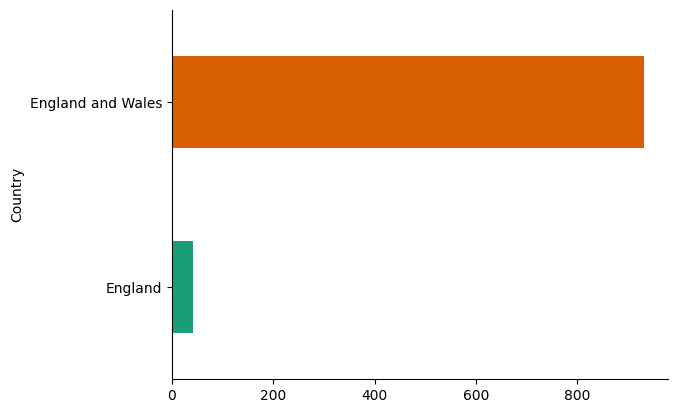

In [12]:
# @title Country

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Country').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

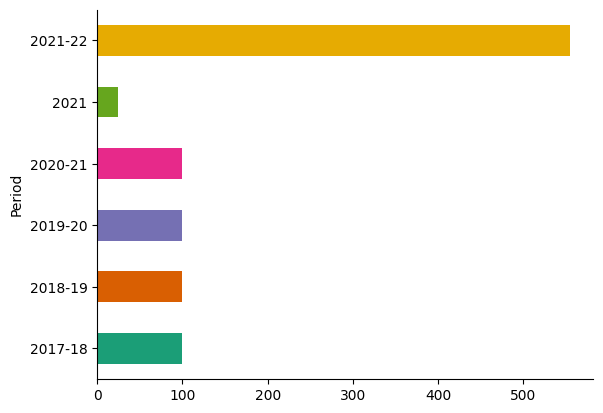

In [13]:
# @title Period

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Period').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

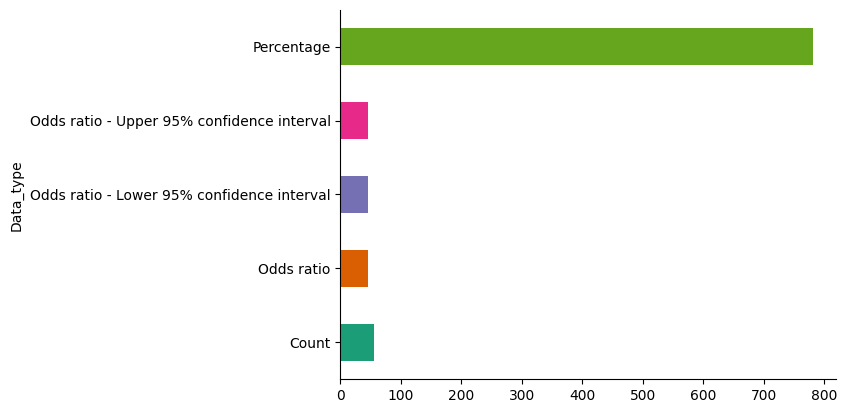

In [14]:
# @title Data_type

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Data_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

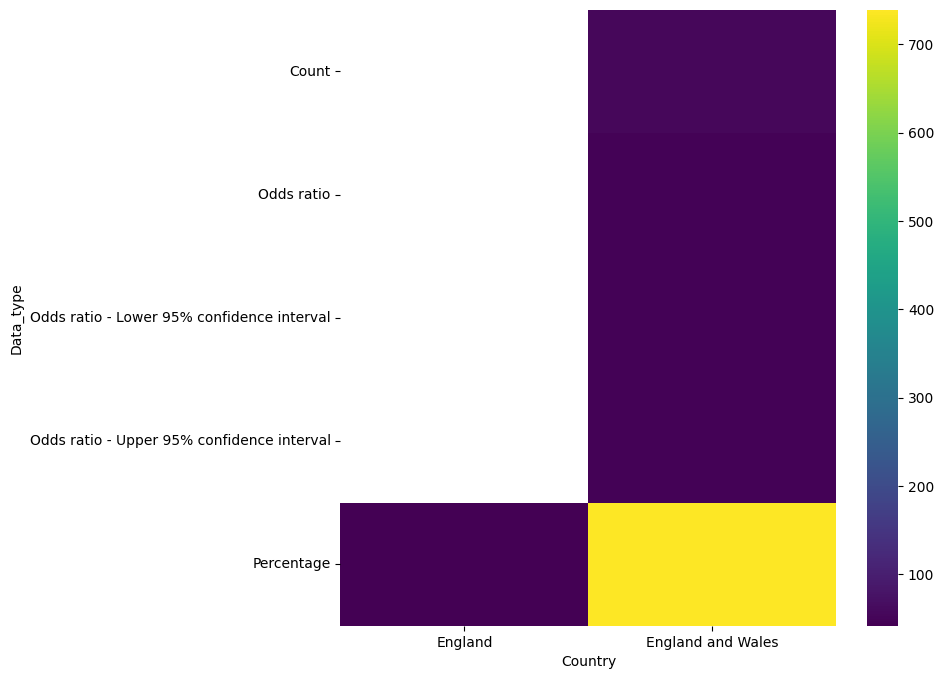

In [15]:
# @title Country vs Data_type

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Data_type'].value_counts()
    for x_label, grp in df.groupby('Country')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Country')
_ = plt.ylabel('Data_type')

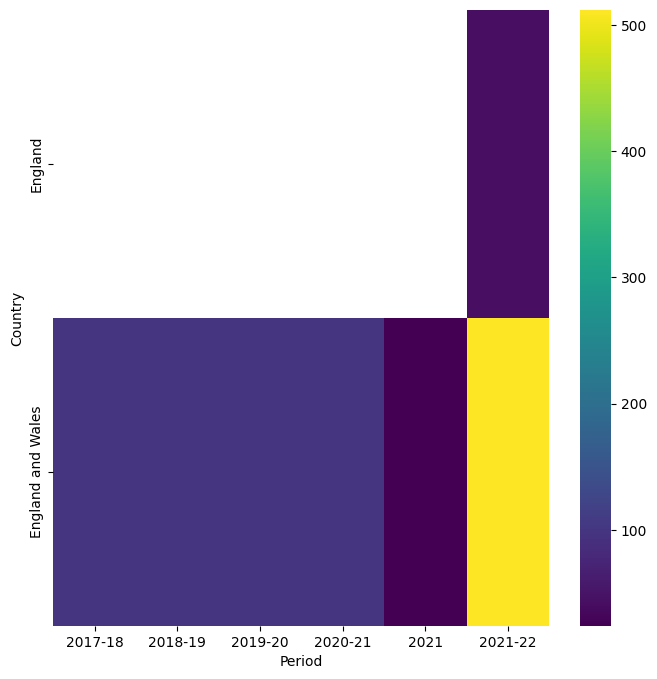

In [16]:
# @title Period vs Country

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Country'].value_counts()
    for x_label, grp in df.groupby('Period')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Period')
_ = plt.ylabel('Country')

### Data : Table 1 - Number of people with type 2 diabetes by age group and audit year

In [18]:
# Data : Table 1 - Number of people with type 2 diabetes by age group and audit year
d1 = df.iloc[:14,3:9]
d1

,Period,Country,Age_group,Breakdown/Measure,Data_type,Value
0,2017-18,England and Wales,<40,NaN,Count,117270.0
1,2018-19,England and Wales,<40,NaN,Count,123830.0
2,2019-20,England and Wales,<40,NaN,Count,129200.0
3,2020-21,England and Wales,<40,NaN,Count,132000.0
4,2021-22,England and Wales,<40,NaN,Count,139255.0
5,2017-18,England and Wales,40-79,NaN,Count,2488330.0
6,2018-19,England and Wales,40-79,NaN,Count,2577295.0
7,2019-20,England and Wales,40-79,NaN,Count,2674395.0
8,2020-21,England and Wales,40-79,NaN,Count,2705585.0
9,2021-22,England and Wales,40-79,NaN,Count,2769415.0


#### Visualizations on Table 1 - Number of people with type 2 diabetes by age group and audit year

Loading the dataset and grouping it by 'Period' and 'Age_group', and calculates the total count of cases for each group. It then creates a bar chart to visualize the number of people with type 2 diabetes by period and age group, with clear labels, a legend, and a title.

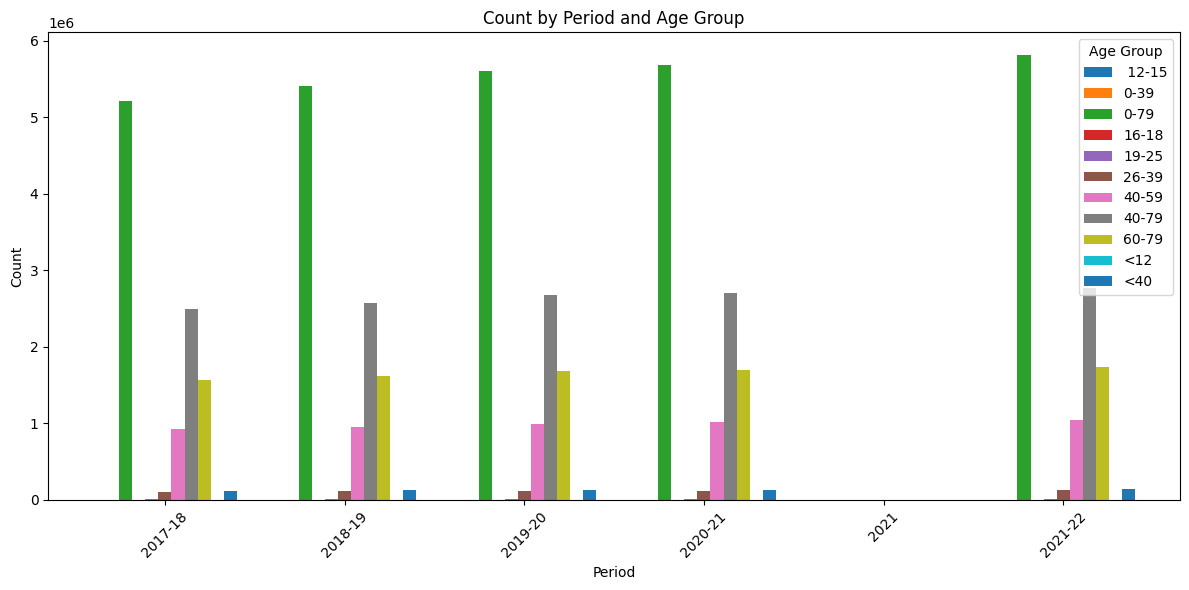

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('NDA Young People with Type 2 Diabetes 2021-22 - Open Data v1.0.csv')

# Group by Period and Age_group, and calculate the sum of Value for each group
grouped_data = data.groupby(['Period', 'Age_group'])['Value'].sum().unstack()

# Plot the data
ax = grouped_data.plot(kind='bar', figsize=(12, 6), width=0.8)
plt.title('Count by Period and Age Group')
plt.xlabel('Period')
plt.ylabel('Count')
plt.legend(title='Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Loading the dataset and converting the 'Period' column to a datetime format using the starting year. Then creating three visualizations: a line plot to show the count of type 2 diabetes cases over time for each age group, a stacked bar plot to illustrate the total counts by age group for each period, and a box plot to display the distribution of values across different age groups, highlighting the spread and any outliers. These visualizations help in understanding trends, cumulative counts, and variability in the data.

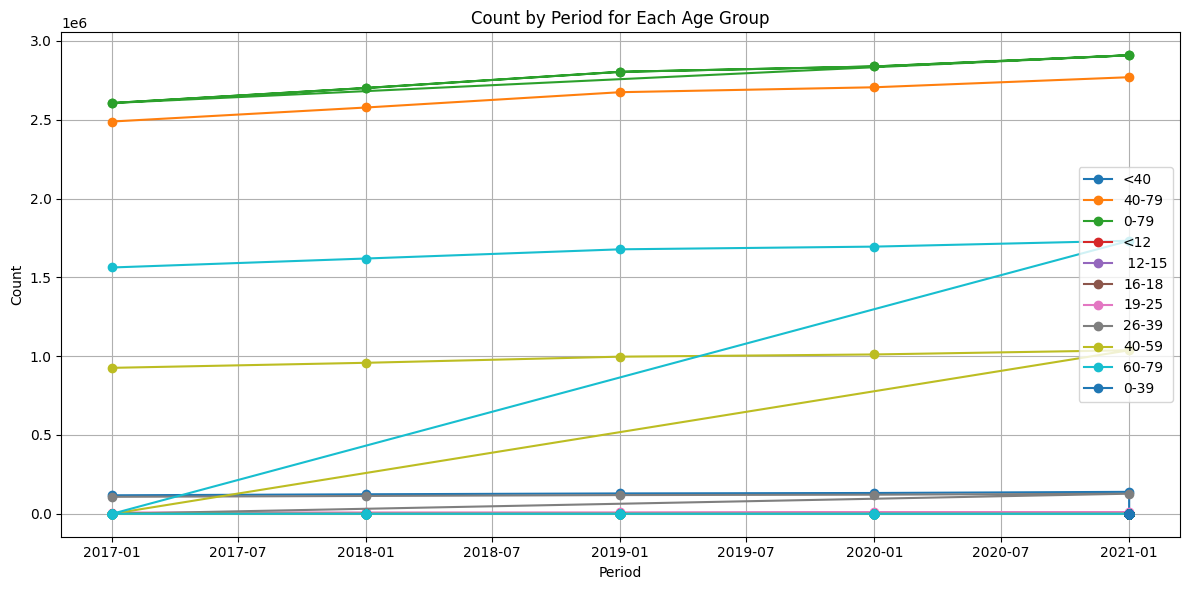

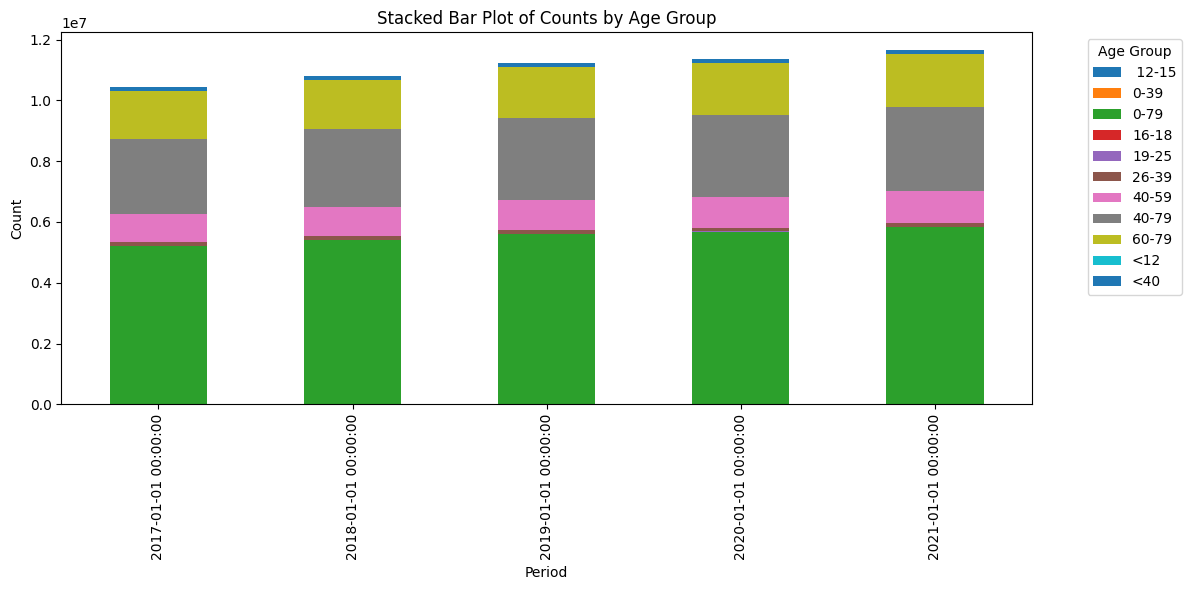

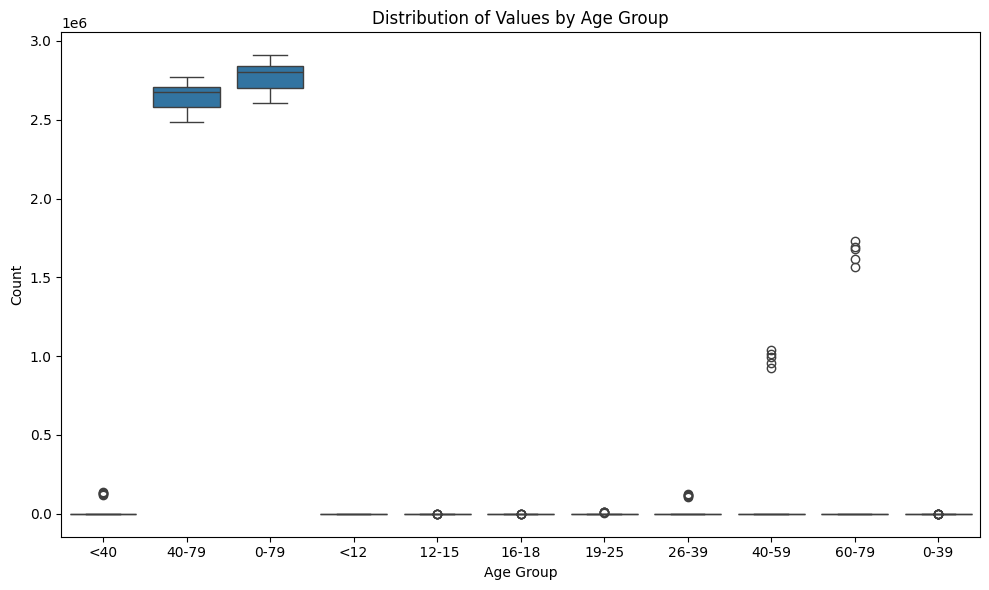

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('NDA Young People with Type 2 Diabetes 2021-22 - Open Data v1.0.csv')

# Convert Period to datetime (use the first year of the period)
data['Period'] = pd.to_datetime(data['Period'].str[:4], format='%Y')

# 1. Line plot for all age groups
plt.figure(figsize=(12, 6))
for age_group in data['Age_group'].unique():
    age_data = data[data['Age_group'] == age_group]
    plt.plot(age_data['Period'], age_data['Value'], marker='o', label=age_group)

plt.title('Count by Period for Each Age Group')
plt.xlabel('Period')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Stacked bar plot
data_pivot = data.pivot_table(index='Period', columns='Age_group', values='Value', aggfunc='sum')
data_pivot.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Stacked Bar Plot of Counts by Age Group')
plt.xlabel('Period')
plt.ylabel('Count')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# 3. Box plot of values by age group
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age_group', y='Value', data=data)
plt.title('Distribution of Values by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


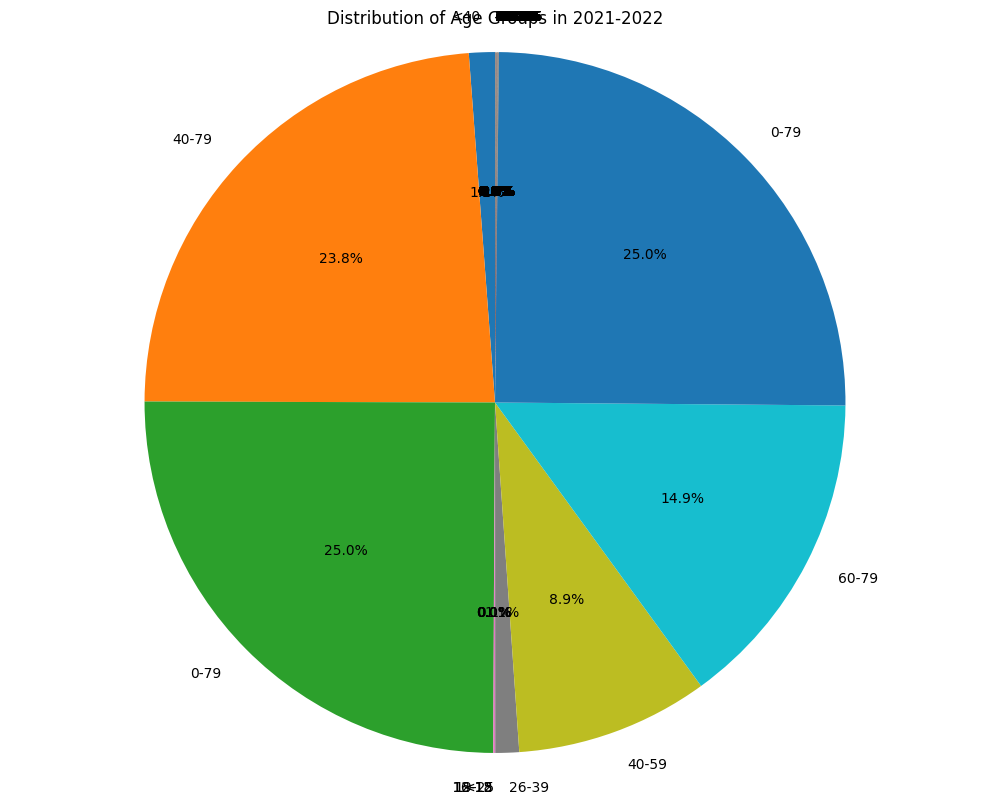

In [20]:
# 4. Pie chart of the latest period
latest_period = data['Period'].max()
latest_data = data[data['Period'] == latest_period]

plt.figure(figsize=(10, 8))
plt.pie(latest_data['Value'], labels=latest_data['Age_group'], autopct='%1.1f%%', startangle=90)
plt.title(f'Distribution of Age Groups in {latest_period.year}-{latest_period.year + 1}')
plt.axis('equal')
plt.tight_layout()
plt.show()

After completing all the visualizations, we will now proceed with data preprocessing and model training to prepare the dataset for analysis and develop predictive models.

# **Data Preprocessing and Model Training**

## **Logistic Regression**

Code handles categorical variables by encoding them into numerical values. It uses `LabelEncoder` from the `sklearn.preprocessing` module to transform each categorical column in the DataFrame `df` into numeric form, storing the encoders for potential inverse transformations later.

In [21]:
# Preprocessing: Handling categorical variables and missing values
# Encoding categorical columns
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le

Using 'SimpleImputer', this code imputes missing values using the mean of each column. Using `StandardScaler`, it then scales all features to have a mean of 0 and a standard deviation of 1. The 'Diabetes_Status' column is also checked to see whether it exists; if not, a synthetic column representing the presence or absence of diabetes is created with random binary values, guaranteeing that the dataset includes a target variable for model training.

In [22]:
# Handling missing values
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [23]:
# Feature scaling
scaler = StandardScaler()
df[df.columns] = scaler.fit_transform(df)

In [24]:
# Check if 'Diabetes_Status' column exists; if not, create it synthetically for this example
if 'Diabetes_Status' not in df.columns:
    # For the purpose of this example, let's create a synthetic 'Diabetes_Status' column
    # Here, we randomly assign 0 or 1 to simulate the presence/absence of diabetes
    import numpy as np
    np.random.seed(42)
    df['Diabetes_Status'] = np.random.randint(0, 2, df.shape[0])

In order to prepare the dataset for training, this code defines the variables `X' (features) and `y' (target variable, 'Diabetes_Status'). The data is then divided into training and testing sets, with 20% set aside for testing. Ultimately, a logistic regression model is trained using the training data, and iterations up to 1000 are performed to ensure the model fits.

In [25]:
# Define X and y
X = df.drop('Diabetes_Status', axis=1)
y = df['Diabetes_Status']

In [26]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

By generating predictions on the test set, this function assesses how well the trained logistic regression model performs. In addition to printing the accuracy and a comprehensive classification report with metrics like precision, recall, and F1-score for every class, it computes the accuracy score of these predictions. The outcome indicates an accuracy of around 44.6%.

In [28]:
# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.4461538461538462
Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.40      0.42        97
           1       0.45      0.49      0.47        98

    accuracy                           0.45       195
   macro avg       0.45      0.45      0.44       195
weighted avg       0.45      0.45      0.45       195



The code uses the AUC-ROC measure to assess the performance of the logistic regression model. It computes the AUC-ROC score, predicts the probability for the positive class, and prints the result. The AUC value is then displayed on the ROC curve, which illustrates the trade-off between the true positive rate and false positive rate. The ROC curve aids in evaluating how well the model can discriminate across classes.

In [29]:
# Calculate AUC-ROC
y_pred_proba = model.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_pred_proba)
print("AUC-ROC:", auc_roc)

AUC-ROC: 0.44940037870818433


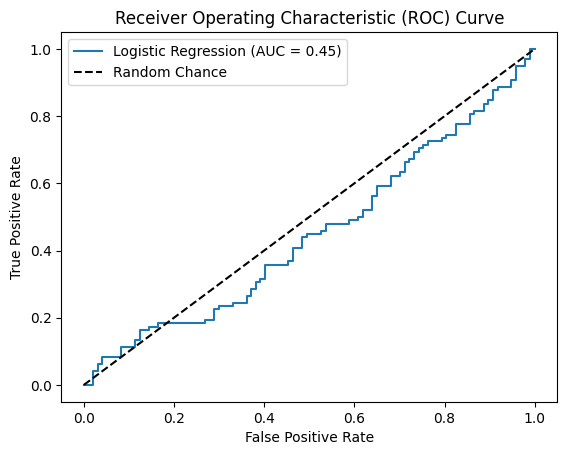

In [30]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## **Decision Tree**

Importing essential libraries for data manipulation, visualization, and machine learning. Then loading the dataset from a CSV file into a DataFrame and displays the first few rows to give an overview of the data's structure and contents.

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler, LabelBinarizer
from sklearn.impute import SimpleImputer

In [32]:
# Load the dataset
file_path = 'NDA Young People with Type 2 Diabetes 2021-22 - Open Data v1.0.csv'
df = pd.read_csv(file_path)

In [33]:
# Display first few rows
df.head()

,Section,Table/Figure,Title,Period,Country,Age_group,Breakdown/Measure,Data_type,Value,Value_Denominator,Value_Numerator
0,Characteristics and trends,Table 1,Number of people with type 2 diabetes by age g...,2017-18,England and Wales,<40,NaN,Count,117270.0,NaN,NaN
1,Characteristics and trends,Table 1,Number of people with type 2 diabetes by age g...,2018-19,England and Wales,<40,NaN,Count,123830.0,NaN,NaN
2,Characteristics and trends,Table 1,Number of people with type 2 diabetes by age g...,2019-20,England and Wales,<40,NaN,Count,129200.0,NaN,NaN
3,Characteristics and trends,Table 1,Number of people with type 2 diabetes by age g...,2020-21,England and Wales,<40,NaN,Count,132000.0,NaN,NaN
4,Characteristics and trends,Table 1,Number of people with type 2 diabetes by age g...,2021-22,England and Wales,<40,NaN,Count,139255.0,NaN,NaN


In [34]:
# Summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Section            974 non-null    object 
 1   Table/Figure       935 non-null    object 
 2   Title              974 non-null    object 
 3   Period             974 non-null    object 
 4   Country            974 non-null    object 
 5   Age_group          974 non-null    object 
 6   Breakdown/Measure  919 non-null    object 
 7   Data_type          974 non-null    object 
 8   Value              974 non-null    float64
 9   Value_Denominator  781 non-null    float64
 10  Value_Numerator    781 non-null    float64
dtypes: float64(3), object(8)
memory usage: 83.8+ KB


In [35]:
# Summary statistics of numerical columns
df.describe()

,Value,Value_Denominator,Value_Numerator
count,9.740000e+02,7.810000e+02,7.810000e+02
mean,5.694043e+04,8.419714e+05,3.170195e+05
std,3.619963e+05,2.009113e+06,1.122163e+06
min,0.000000e+00,4.500000e+01,0.000000e+00
25%,4.225000e+00,8.725000e+03,1.620000e+03
50%,2.190000e+01,1.187250e+05,2.031000e+04
75%,8.060000e+01,1.037340e+06,2.451750e+05
max,2.908670e+06,1.569696e+07,1.569696e+07


In [36]:
# Preprocessing: Handling categorical variables and missing values
# Encoding categorical columns
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le

In [37]:
# Handling missing values
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [38]:
# Feature scaling
scaler = StandardScaler()
df[df.columns] = scaler.fit_transform(df)

In order to train a decision tree model, this code defines the variables `X' (features) and `y' (target variable, 'Age_group'). Training a decision tree classifier on the training data involves encoding the target variable as categorical data, dividing the dataset into training and testing sets, and setting aside 20% for testing.

In [39]:
# Define X and y
X = df.drop('Age_group', axis=1)
y = df['Age_group']

In [40]:
# Ensure target variable is treated as categorical
le_y = LabelEncoder()
y = le_y.fit_transform(y)

In [41]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Decision Tree Model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

Predicting the target variable on the test set is how this algorithm assesses the trained decision tree model's performance. It produces a comprehensive classification report with precision, recall, and F1-score for every class in addition to computing and printing the model's accuracy, which is around 99.5%.

In [43]:
# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9948717948717949
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        30
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        47
           5       0.97      1.00      0.98        31
           6       1.00      1.00      1.00        29
           8       1.00      1.00      1.00        30
           9       1.00      1.00      1.00         5
          10       1.00      0.86      0.92         7

    accuracy                           0.99       195
   macro avg       1.00      0.98      0.99       195
weighted avg       1.00      0.99      0.99       195



The ROC curve for each class in a multi-class classification issue is computed and plotted using this code. The target variable is binarized using {LabelBinarizer}, after which the expected probabilities for each class are calculated. Plotting the ROC curve and AUC score for every class demonstrates how effectively the model differentiates between each class and chance. The real positive rate is plotted on the y-axis and the false positive rate is plotted on the x-axis to visualise the results.

In [44]:
# Calculate AUC-ROC for each class using LabelBinarizer
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)
y_pred_proba = model.predict_proba(X_test)

In [45]:
# Check the number of classes
print(f"Number of classes in y_test: {len(lb.classes_)}")
print(f"Shape of y_pred_proba: {y_pred_proba.shape}")

Number of classes in y_test: 9
Shape of y_pred_proba: (195, 11)


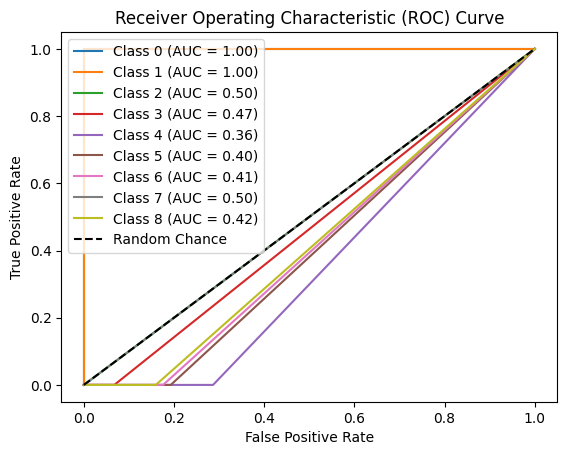

In [46]:
# Plot ROC Curve for each class
fpr = {}
tpr = {}
plt.figure()
for i in range(len(lb.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc_score(y_test_binarized[:, i], y_pred_proba[:, i]):.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## **Support Vector Machine**

Importing essential libraries for data manipulation, visualization, and machine learning. Then loading the dataset from a CSV file into a DataFrame and displays the first few rows to give an overview of the data's structure and contents.

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [48]:
# Load the dataset
file_path = 'NDA Young People with Type 2 Diabetes 2021-22 - Open Data v1.0.csv'
df = pd.read_csv(file_path)

In [49]:
# Display first few rows
df.head()

,Section,Table/Figure,Title,Period,Country,Age_group,Breakdown/Measure,Data_type,Value,Value_Denominator,Value_Numerator
0,Characteristics and trends,Table 1,Number of people with type 2 diabetes by age g...,2017-18,England and Wales,<40,NaN,Count,117270.0,NaN,NaN
1,Characteristics and trends,Table 1,Number of people with type 2 diabetes by age g...,2018-19,England and Wales,<40,NaN,Count,123830.0,NaN,NaN
2,Characteristics and trends,Table 1,Number of people with type 2 diabetes by age g...,2019-20,England and Wales,<40,NaN,Count,129200.0,NaN,NaN
3,Characteristics and trends,Table 1,Number of people with type 2 diabetes by age g...,2020-21,England and Wales,<40,NaN,Count,132000.0,NaN,NaN
4,Characteristics and trends,Table 1,Number of people with type 2 diabetes by age g...,2021-22,England and Wales,<40,NaN,Count,139255.0,NaN,NaN


In [50]:
# Summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Section            974 non-null    object 
 1   Table/Figure       935 non-null    object 
 2   Title              974 non-null    object 
 3   Period             974 non-null    object 
 4   Country            974 non-null    object 
 5   Age_group          974 non-null    object 
 6   Breakdown/Measure  919 non-null    object 
 7   Data_type          974 non-null    object 
 8   Value              974 non-null    float64
 9   Value_Denominator  781 non-null    float64
 10  Value_Numerator    781 non-null    float64
dtypes: float64(3), object(8)
memory usage: 83.8+ KB


In [51]:
# Summary statistics of numerical columns
df.describe()

,Value,Value_Denominator,Value_Numerator
count,9.740000e+02,7.810000e+02,7.810000e+02
mean,5.694043e+04,8.419714e+05,3.170195e+05
std,3.619963e+05,2.009113e+06,1.122163e+06
min,0.000000e+00,4.500000e+01,0.000000e+00
25%,4.225000e+00,8.725000e+03,1.620000e+03
50%,2.190000e+01,1.187250e+05,2.031000e+04
75%,8.060000e+01,1.037340e+06,2.451750e+05
max,2.908670e+06,1.569696e+07,1.569696e+07


In [52]:
# Preprocessing: Handling categorical variables and missing values
# Encoding categorical columns
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le


In [53]:
# Handling missing values
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [54]:
# Feature scaling
scaler = StandardScaler()
df[df.columns] = scaler.fit_transform(df)

The Support Vector Machine (SVM) model is configured and trained by this code. The 'Value' column from the DataFrame is defined as the target variable, 'y', and `X' as the feature set. Categorical data is the encoded form of the target variable. Twenty percent of the dataset is set aside for testing and is divided into training and testing sets. Next, using the training data, an SVM model with probability estimates enabled is trained.

In [55]:
# Define X and y
X = df.drop('Age_group', axis=1)
y = df['Value']

In [56]:
# Ensure target variable is treated as categorical
y = LabelEncoder().fit_transform(y)

In [57]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# Support Vector Machine Model
model = SVC(probability=True)
model.fit(X_train, y_train)

SVC(probability=True)

Code uses the test set's target variable as a predictor to assess how well the trained Support Vector Machine (SVM) model performs. A classification report containing the precision, recall, and F1-score for each class is printed along with the accuracy, which is estimated to be 22.6%. To address situations when a class may not be predicted at all, `zero_division=1} is used.

In [59]:
# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

Accuracy: 0.22564102564102564
Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.00      0.00         1
           2       1.00      0.00      0.00         1
           9       1.00      0.00      0.00         2
          10       1.00      0.00      0.00         1
          13       1.00      0.00      0.00         2
          16       1.00      0.00      0.00         1
          20       0.00      1.00      0.00         0
          23       1.00      0.00      0.00         1
          24       1.00      0.00      0.00         1
          28       1.00      0.00      0.00         1
          30       1.00      0.00      0.00         1
          31       1.00      0.00      0.00         2
          33       1.00      0.00      0.00         1
          34       1.00      0.00      0.00         1
          37       0.17      0.88      0.29         8
          41       1.00      0.00      0.00         1
          44       1.00     

A classification report is used by this code to assess and illustrate the model's performance. It defines the function `plot_classification_report}, which takes a DataFrame as input and uses Seaborn to plot the data as a heatmap with metrics for each class, including F1-score, precision, and recall. To aid in understanding the model's performance, a title and the associated labels are presented on the heatmap.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

<Figure size 800x600 with 0 Axes>

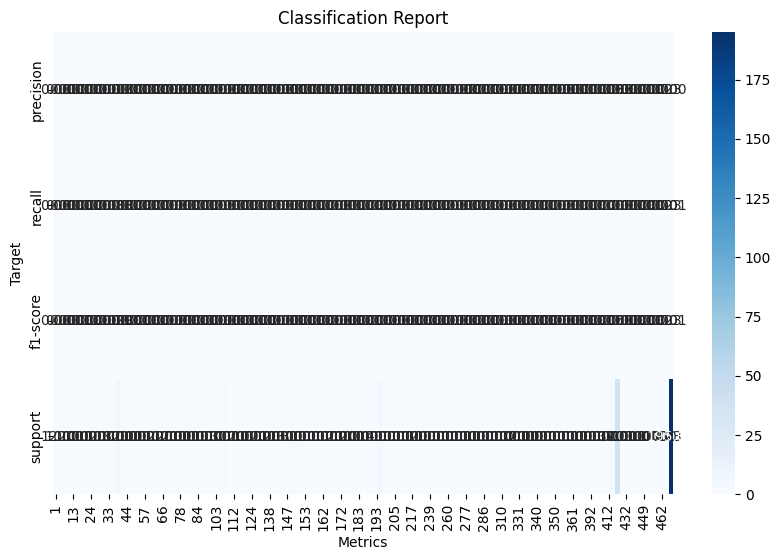

In [60]:
# Plot ROC Curve for each class using One-vs-Rest (OvR) strategy
# Plotting the classification report
def plot_classification_report(y_true, y_pred, ax=None):
    report = classification_report(y_true, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose()
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))
    sns.heatmap(df_report.iloc[:-1, :].T, annot=True, ax=ax, cmap='Blues', fmt=".2f")
    ax.set_title('Classification Report')
    ax.set_xlabel('Metrics')
    ax.set_ylabel('Target')
    return ax

plt.figure(figsize=(8, 6))
plot_classification_report(y_test, y_pred)
plt.show()

## **Neural Networks**

Importing essential libraries for data manipulation, visualization, and machine learning. Then loading the dataset from a CSV file into a DataFrame and displays the first few rows to give an overview of the data's structure and contents.

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.exceptions import UndefinedMetricWarning
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [62]:
# Load the dataset
file_path = 'NDA Young People with Type 2 Diabetes 2021-22 - Open Data v1.0.csv'
df = pd.read_csv(file_path)

In [63]:
# Display first few rows
print(df.head())

                      Section Table/Figure  \
0  Characteristics and trends      Table 1   
1  Characteristics and trends      Table 1   
2  Characteristics and trends      Table 1   
3  Characteristics and trends      Table 1   
4  Characteristics and trends      Table 1   

                                               Title   Period  \
0  Number of people with type 2 diabetes by age g...  2017-18   
1  Number of people with type 2 diabetes by age g...  2018-19   
2  Number of people with type 2 diabetes by age g...  2019-20   
3  Number of people with type 2 diabetes by age g...  2020-21   
4  Number of people with type 2 diabetes by age g...  2021-22   

             Country Age_group Breakdown/Measure Data_type     Value  \
0  England and Wales       <40               NaN     Count  117270.0   
1  England and Wales       <40               NaN     Count  123830.0   
2  England and Wales       <40               NaN     Count  129200.0   
3  England and Wales       <40              

In [64]:
# Summary of the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Section            974 non-null    object 
 1   Table/Figure       935 non-null    object 
 2   Title              974 non-null    object 
 3   Period             974 non-null    object 
 4   Country            974 non-null    object 
 5   Age_group          974 non-null    object 
 6   Breakdown/Measure  919 non-null    object 
 7   Data_type          974 non-null    object 
 8   Value              974 non-null    float64
 9   Value_Denominator  781 non-null    float64
 10  Value_Numerator    781 non-null    float64
dtypes: float64(3), object(8)
memory usage: 83.8+ KB
None


In [65]:
# Summary statistics of numerical columns
print(df.describe())

              Value  Value_Denominator  Value_Numerator
count  9.740000e+02       7.810000e+02     7.810000e+02
mean   5.694043e+04       8.419714e+05     3.170195e+05
std    3.619963e+05       2.009113e+06     1.122163e+06
min    0.000000e+00       4.500000e+01     0.000000e+00
25%    4.225000e+00       8.725000e+03     1.620000e+03
50%    2.190000e+01       1.187250e+05     2.031000e+04
75%    8.060000e+01       1.037340e+06     2.451750e+05
max    2.908670e+06       1.569696e+07     1.569696e+07


In [66]:
# Encoding categorical columns
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le

In [67]:
# Handling missing values
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [68]:
# Feature scaling
scaler = StandardScaler()
df[df.columns] = scaler.fit_transform(df)

In [69]:
# Assuming 'Title' is the target variable
X = df.drop('Title', axis=1)
y = df['Title']

In [70]:
# Convert to string type to ensure it's treated as categorical
y = df['Title'].astype(str)


With 20% of the dataset set aside for testing, this algorithm divides the dataset into training and testing sets. After that, a neural network model with a single hidden layer of 100 neurones and a maximum of 1000 iterations is defined and trained using `MLPClassifier}. To ensure repeatability, the model is fitted using a predetermined random seed on the training set of data.

In [71]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
# Neural Network Model
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

In [73]:
# Fit the model
model.fit(X_train, y_train)

MLPClassifier(max_iter=1000, random_state=42)

In [74]:
# Suppress UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

Through prediction of the test set's target variable, this function assesses how well the trained neural network model performs. It computes and outputs the accuracy, which is around 95.9%, and offers a thorough classification report with precision, recall, and F1-score for every class. To handle divisions by zero in the metrics, use {zero_division=1}.

In [75]:
# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

Accuracy: 0.958974358974359
Classification Report:
                      precision    recall  f1-score   support

-0.08391213104986046       1.00      1.00      1.00        21
-0.29187756525485836       1.00      1.00      1.00        31
 -0.4998429994598563       1.00      1.00      1.00        22
 -0.7078084336648541       1.00      1.00      1.00         6
  -0.915773867869852       1.00      1.00      1.00        16
 -1.1237393020748498       1.00      1.00      1.00        16
 -1.3317047362798478       1.00      1.00      1.00        14
 0.12405330315513742       1.00      1.00      1.00        13
  0.3320187373601353       1.00      1.00      1.00        16
  0.5399841715651332       1.00      1.00      1.00         9
  0.7479496057701311       1.00      1.00      1.00         7
  0.9559150399751289       1.00      1.00      1.00         2
   1.163880474180127       1.00      1.00      1.00         4
  1.3718459083851249       1.00      0.83      0.91         6
  1.57981134259012

The confusion matrix for the predictions of the model is shown using this code. The confusion matrix is heatmapped using `sns.heatmap`, displaying the counts of true positive, true negative, false positive, and false negative predictions. The graphic is coloured with the 'Blues' colormap and annotated with numerical values. Labelled axes show the true and expected values.

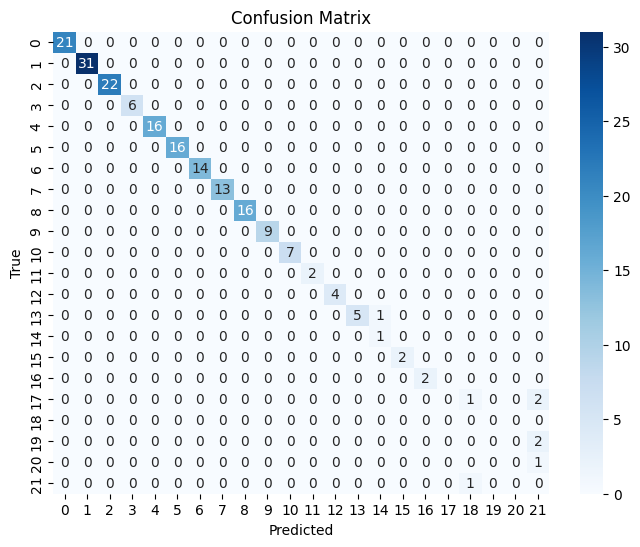

In [76]:
# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## **Ensemble Methods**

Importing essential libraries for data manipulation, visualization, and machine learning. Then loading the dataset from a CSV file into a DataFrame and displays the first few rows to give an overview of the data's structure and contents.

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [78]:
# Load the dataset
file_path = 'NDA Young People with Type 2 Diabetes 2021-22 - Open Data v1.0.csv'
df = pd.read_csv(file_path)

In [79]:
# Display first few rows
print(df.head())

                      Section Table/Figure  \
0  Characteristics and trends      Table 1   
1  Characteristics and trends      Table 1   
2  Characteristics and trends      Table 1   
3  Characteristics and trends      Table 1   
4  Characteristics and trends      Table 1   

                                               Title   Period  \
0  Number of people with type 2 diabetes by age g...  2017-18   
1  Number of people with type 2 diabetes by age g...  2018-19   
2  Number of people with type 2 diabetes by age g...  2019-20   
3  Number of people with type 2 diabetes by age g...  2020-21   
4  Number of people with type 2 diabetes by age g...  2021-22   

             Country Age_group Breakdown/Measure Data_type     Value  \
0  England and Wales       <40               NaN     Count  117270.0   
1  England and Wales       <40               NaN     Count  123830.0   
2  England and Wales       <40               NaN     Count  129200.0   
3  England and Wales       <40              

In [80]:
# Summary of the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Section            974 non-null    object 
 1   Table/Figure       935 non-null    object 
 2   Title              974 non-null    object 
 3   Period             974 non-null    object 
 4   Country            974 non-null    object 
 5   Age_group          974 non-null    object 
 6   Breakdown/Measure  919 non-null    object 
 7   Data_type          974 non-null    object 
 8   Value              974 non-null    float64
 9   Value_Denominator  781 non-null    float64
 10  Value_Numerator    781 non-null    float64
dtypes: float64(3), object(8)
memory usage: 83.8+ KB
None


In [81]:
# Summary statistics of numerical columns
print(df.describe())

              Value  Value_Denominator  Value_Numerator
count  9.740000e+02       7.810000e+02     7.810000e+02
mean   5.694043e+04       8.419714e+05     3.170195e+05
std    3.619963e+05       2.009113e+06     1.122163e+06
min    0.000000e+00       4.500000e+01     0.000000e+00
25%    4.225000e+00       8.725000e+03     1.620000e+03
50%    2.190000e+01       1.187250e+05     2.031000e+04
75%    8.060000e+01       1.037340e+06     2.451750e+05
max    2.908670e+06       1.569696e+07     1.569696e+07


In [82]:
# Preprocessing: Handling categorical variables and missing values
# Encoding categorical columns
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le

In [83]:
# Handling missing values
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [84]:
# Feature scaling
scaler = StandardScaler()
df[df.columns] = scaler.fit_transform(df)

In [85]:
# Assuming 'Title' is the target variable
X = df.drop('Title', axis=1)
y = df['Title']

In [86]:
# Convert target variable to discrete classes
# Example: If 'Title' is continuous, convert it to categorical
# For demonstration, let's convert it to integer labels
y = y.astype(int)

With 20% set aside for testing, this code divides the dataset into training and testing sets. Next, two ensemble models are defined: `RandomForestClassifier` and `GradientBoostingClassifier'. To ensure repeatability, each model has a fixed random seed. Using soft voting, a `VotingClassifier' is constructed to aggregate these models and generate a final forecast by averaging the projected probabilities. Next, using the training set of data, the voting classifier is trained.

In [87]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
# Ensemble Methods: RandomForest, GradientBoosting, VotingClassifier
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)

In [89]:
# Voting Classifier
voting_model = VotingClassifier(estimators=[('rf', rf_model), ('gb', gb_model)], voting='soft')

In [90]:
# Fit the VotingClassifier
voting_model.fit(X_train, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(random_state=42))],
                 voting='soft')

This function predicts the target variable on the test set in order to assess the `VotingClassifier`'s` performance. It presents a comprehensive classification report with a 100% accuracy rate, demonstrating that the model accurately identifies every test sample.

In [91]:
# Model Evaluation
y_pred = voting_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        30
           0       1.00      1.00      1.00       143
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         4

    accuracy                           1.00       195
   macro avg       1.00      1.00      1.00       195
weighted avg       1.00      1.00      1.00       195



In [92]:
# Combine predicted labels and features for visualization
result_df = pd.DataFrame(X_test, columns=X.columns)
result_df['Predicted_Title'] = y_pred

This code uses a pairplot from Seaborn to visualise the dataset. For better aesthetics, it sets the style to "ticks" and produces a pairplot of the 'result_df' DataFrame. The figure is coloured in accordance with the projected titles when the `hue' parameter is set to 'Predicted_Title.' On the diagonal, `diag_kind='kde'' shows the Kernel Density Estimates. Plotting the resultant data, coloured by anticipated titles, reveals pairwise correlations between attributes and their distributions.

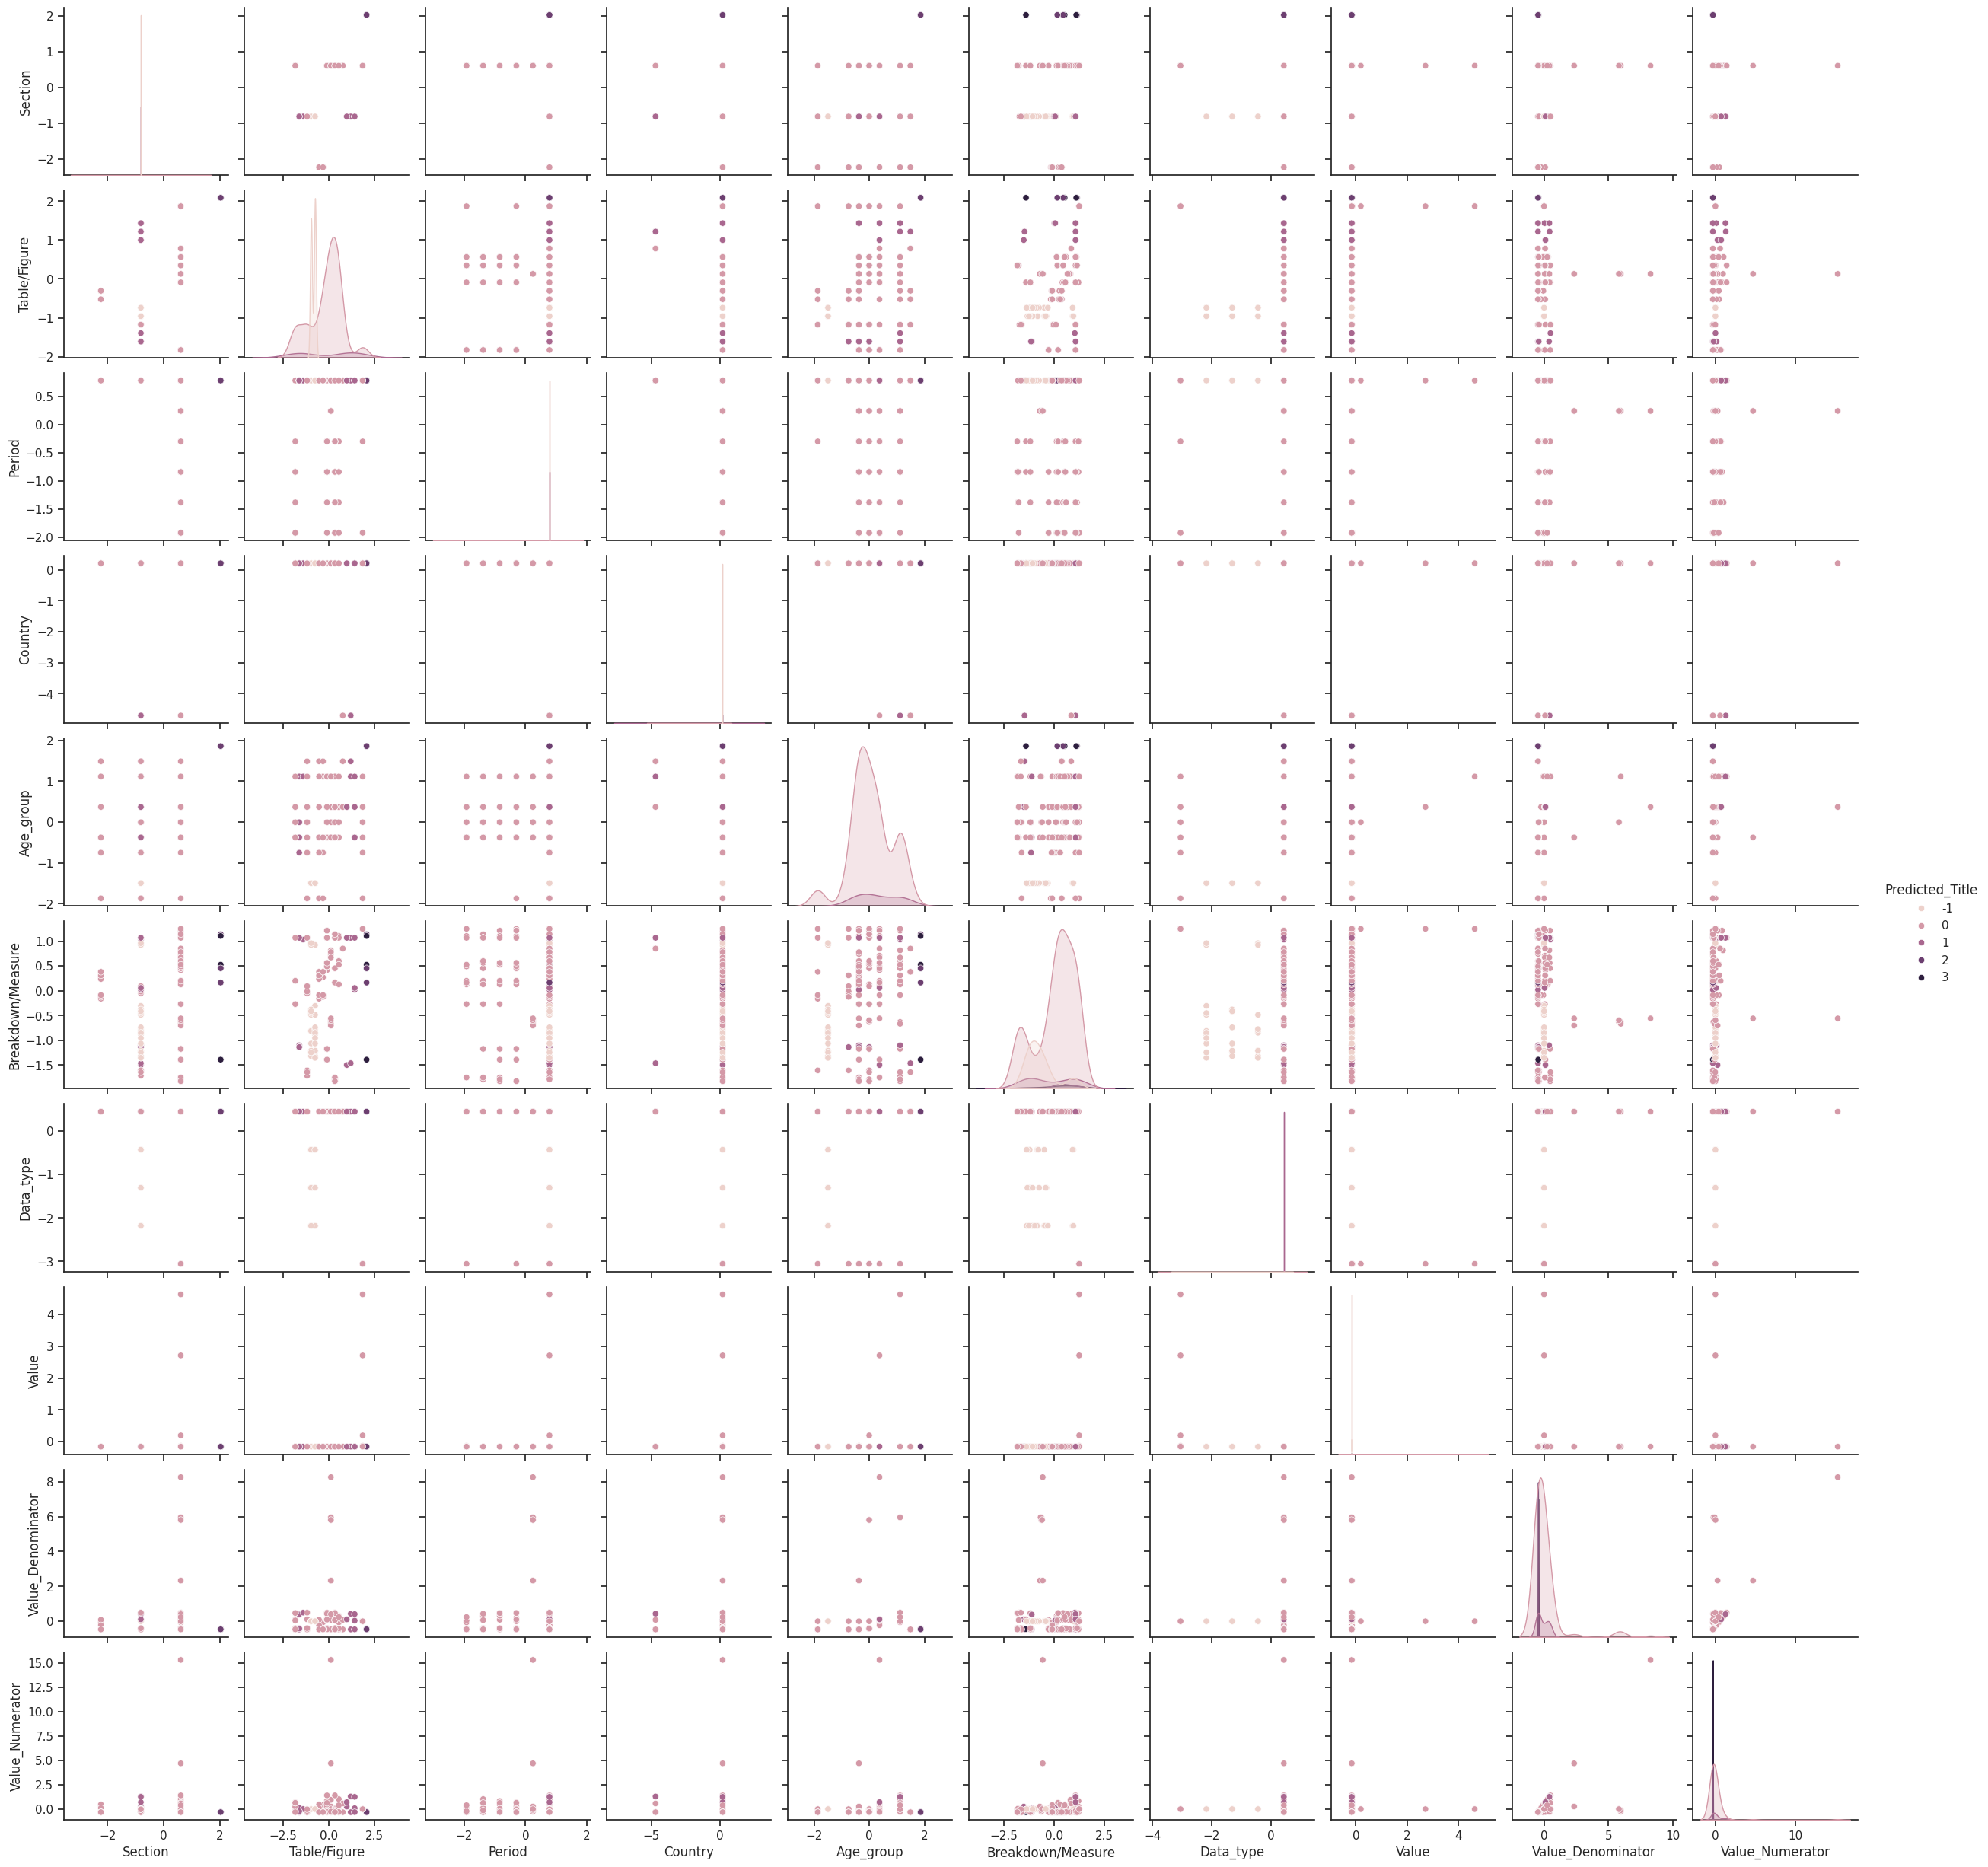

In [93]:
# Visualize using pairplot
sns.set(style="ticks")  # Set the seaborn style to "ticks"
sns.pairplot(result_df, hue='Predicted_Title', diag_kind='kde')
plt.show()

## **Support Vector Machine Regressor**


After importing and reviewing a dataset, this code processes and analyses data on instances of type 2 diabetes. The procedure involves preparing the target variables and features, training the Support Vector Regressor, and using a preprocessing pipeline to handle categorical data. With Mean Absolute Error, the model is assessed. In addition, the algorithm presents a summary of important information, such as total cases and growth rates, using a text-based visualisation; it also computes growth rates from year to year and plots patterns over time for visualisation.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Section            974 non-null    object 
 1   Table/Figure       935 non-null    object 
 2   Title              974 non-null    object 
 3   Period             974 non-null    object 
 4   Country            974 non-null    object 
 5   Age_group          974 non-null    object 
 6   Breakdown/Measure  919 non-null    object 
 7   Data_type          974 non-null    object 
 8   Value              974 non-null    float64
 9   Value_Denominator  781 non-null    float64
 10  Value_Numerator    781 non-null    float64
dtypes: float64(3), object(8)
memory usage: 83.8+ KB
None

First few rows of the data:
                      Section Table/Figure  \
0  Characteristics and trends      Table 1   
1  Characteristics and trends      Table 1   
2  Characteristics and trends      Table 1   


<ipython-input-94-859ccaf5c727>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['Period'] = data_subset['Period'].astype(str)
<ipython-input-94-859ccaf5c727>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['Year'] = data_subset['Period'].str[:4].astype(int)
<ipython-input-94-859ccaf5c727>:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

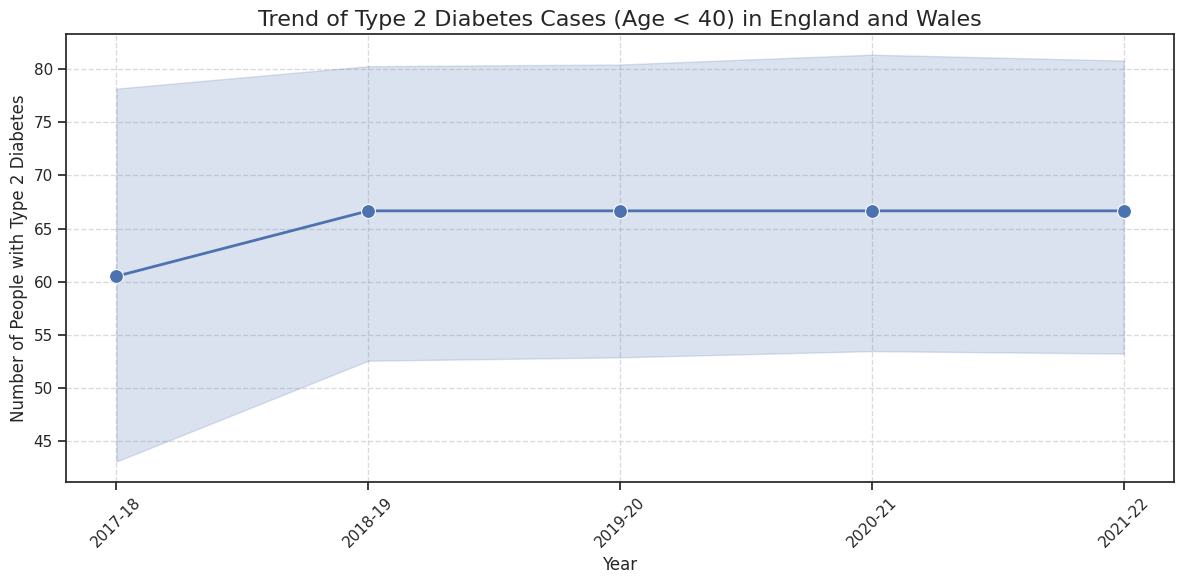

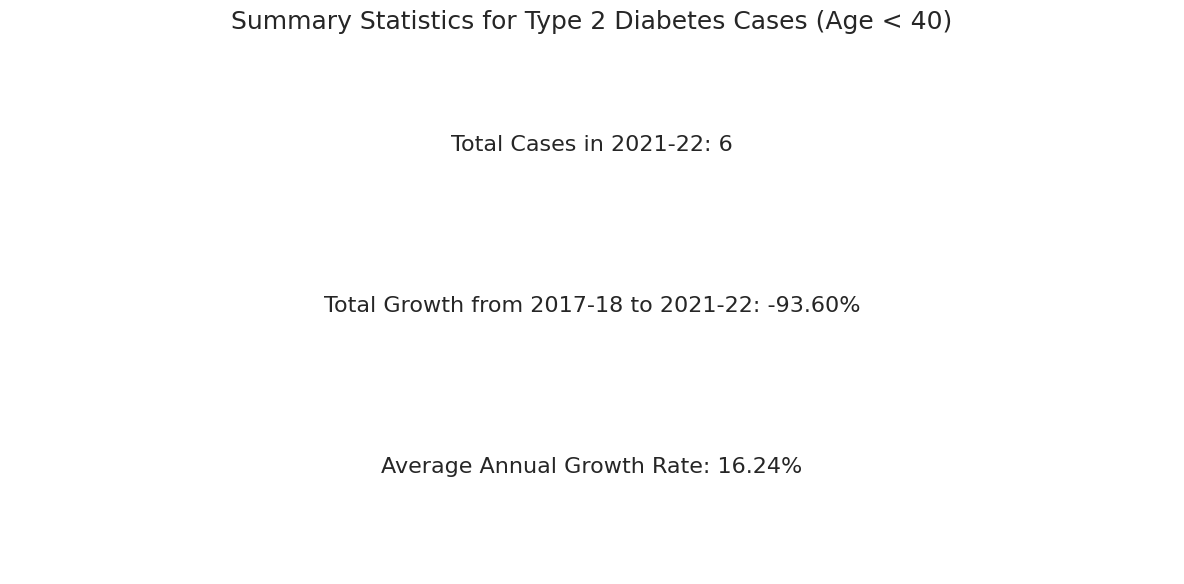

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error,r2_score

# Load the dataset
file_path = 'NDA Young People with Type 2 Diabetes 2021-22 - Open Data v1.0.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
print(data.info())
print("\nFirst few rows of the data:")
print(data.head())

# Extract relevant portion of the dataset (rows 57 to 116)
data_subset = data.iloc[57:117]

# Display the first few rows of the subset
print(data_subset.head())

# Selecting features and target variable
features =  ['Section', 'Table/Figure', 'Title', 'Period', 'Country', 'Age_group', 'Breakdown/Measure', 'Data_type']
target = 'Value'

# Splitting the data into features and target
X = data_subset[features]
y = data_subset[target]

# Handling missing values and categorical encoding
categorical_features = features
numerical_features = []

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Define the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('imputer', SimpleImputer(strategy='mean')),
    ('regressor', SVR(kernel='linear'))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
SVM_mae = mean_absolute_error(y_test, y_pred)
SVM_r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", SVM_mae)
print("Mean Absolute Error:", SVM_r2)

# Convert the Period column to string
data_subset['Period'] = data_subset['Period'].astype(str)

# Calculate year-over-year growth
data_subset['Year'] = data_subset['Period'].str[:4].astype(int)
data_subset['Growth'] = data_subset['Value'].pct_change() * 100

# Calculate total growth from 2017-18 to 2021-22
total_growth = (data_subset['Value'].iloc[-1] - data_subset['Value'].iloc[0]) / data_subset['Value'].iloc[0] * 100

# Create a line plot to show the trend of type 2 diabetes cases over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Period', y='Value', data=data_subset, marker='o', linewidth=2, markersize=10)
plt.title('Trend of Type 2 Diabetes Cases (Age < 40) in England and Wales', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of People with Type 2 Diabetes', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Create a summary statistics visualization
plt.figure(figsize=(12, 6))
plt.text(0.5, 0.8, f"Total Cases in 2021-22: {data_subset['Value'].iloc[-1]:,.0f}",
         horizontalalignment='center', verticalalignment='center', fontsize=16)
plt.text(0.5, 0.5, f"Total Growth from 2017-18 to 2021-22: {total_growth:.2f}%",
         horizontalalignment='center', verticalalignment='center', fontsize=16)
plt.text(0.5, 0.2, f"Average Annual Growth Rate: {data_subset['Growth'].mean():.2f}%",
         horizontalalignment='center', verticalalignment='center', fontsize=16)
plt.axis('off')
plt.title('Summary Statistics for Type 2 Diabetes Cases (Age < 40)', fontsize=18)
plt.tight_layout()
plt.show()


# **Multi-Layer Perceptron Regressor (Neural Network)**

This algorithm analyses a dataset of type 2 diabetes cases in great detail. A histogram is used to display the distribution of the target variable, "Value," once the data has been loaded and prepared. After that, it configures a neural network regressor ({MLPRegressor}) and a machine learning pipeline, runs cross-validation to assess the model, and outputs the R2 score and Mean Absolute Error (MAE). A boxplot is utilised to visualise the outcomes of the cross-validation. Additionally, boxplots are used to visualise the correlations between selected characteristics and the target variable, and the frequency of each category feature is analysed to determine its significance.

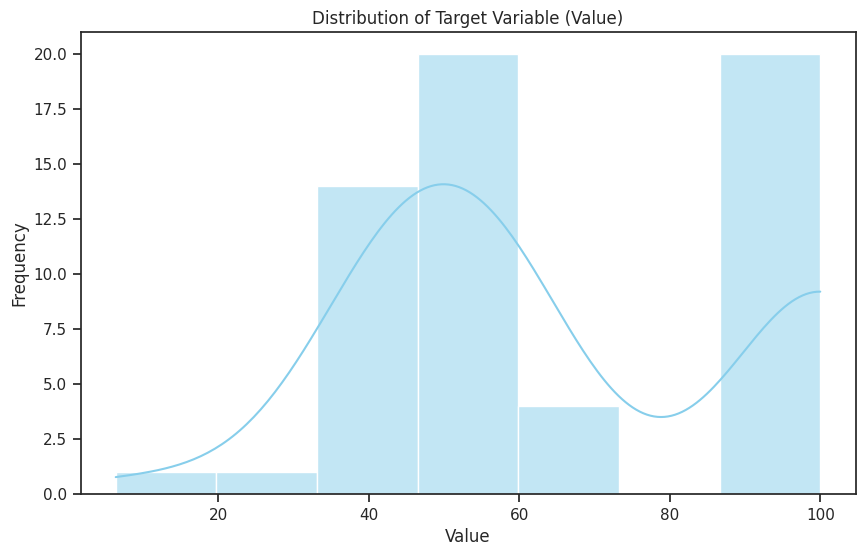

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross-Validation MAE Scores: [11.19274781  1.34452084  0.9552813   0.4017139   6.68659536]
Mean CV MAE: 4.116171841326009
R2 score: 0.1508732188767199


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


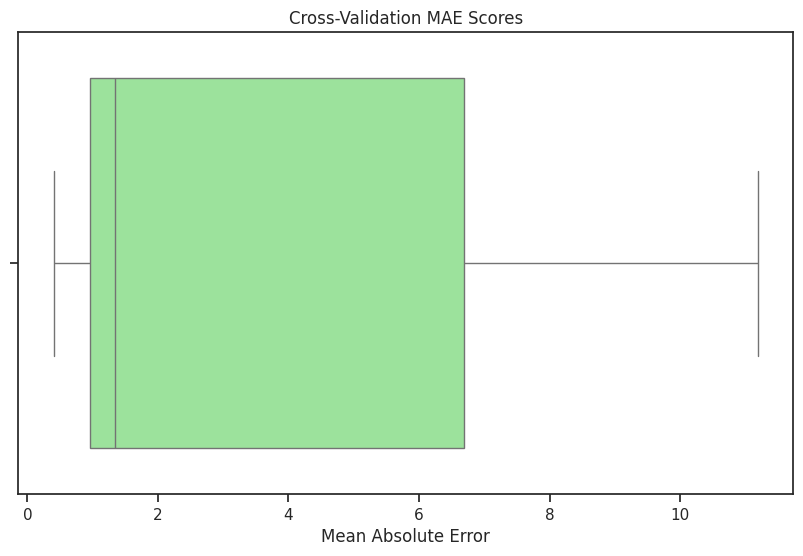

<ipython-input-95-94c77f30c8f2>:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.sum(encoded_features.toarray(), axis=0), y=feature_names, palette='viridis')


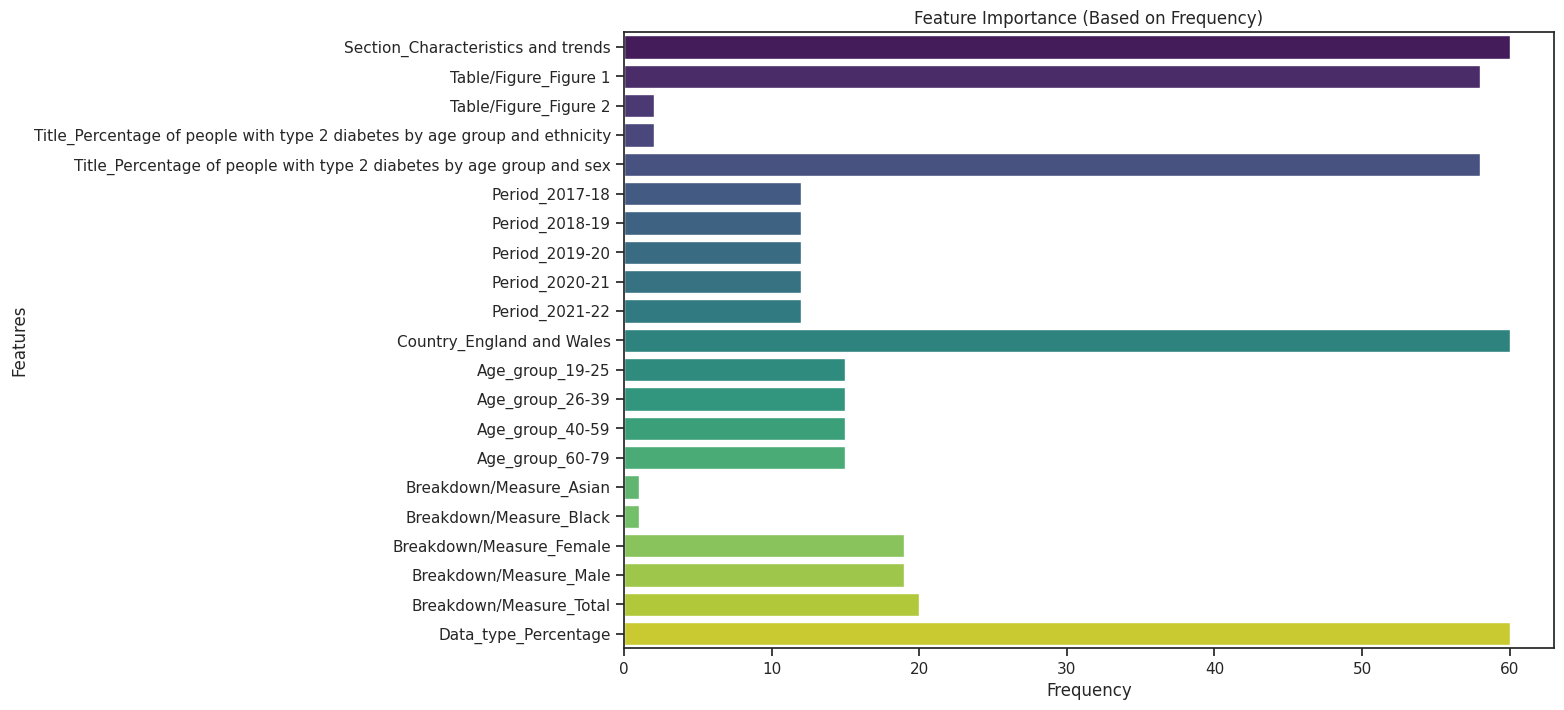

<ipython-input-95-94c77f30c8f2>:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y=target, data=data_subset, ax=ax, palette='Set3')
<ipython-input-95-94c77f30c8f2>:83: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-95-94c77f30c8f2>:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y=target, data=data_subset, ax=ax, palette='Set3')
<ipython-input-95-94c77f30c8f2>:83: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-95-94c77f30c8f2>:82: FutureWarning: 


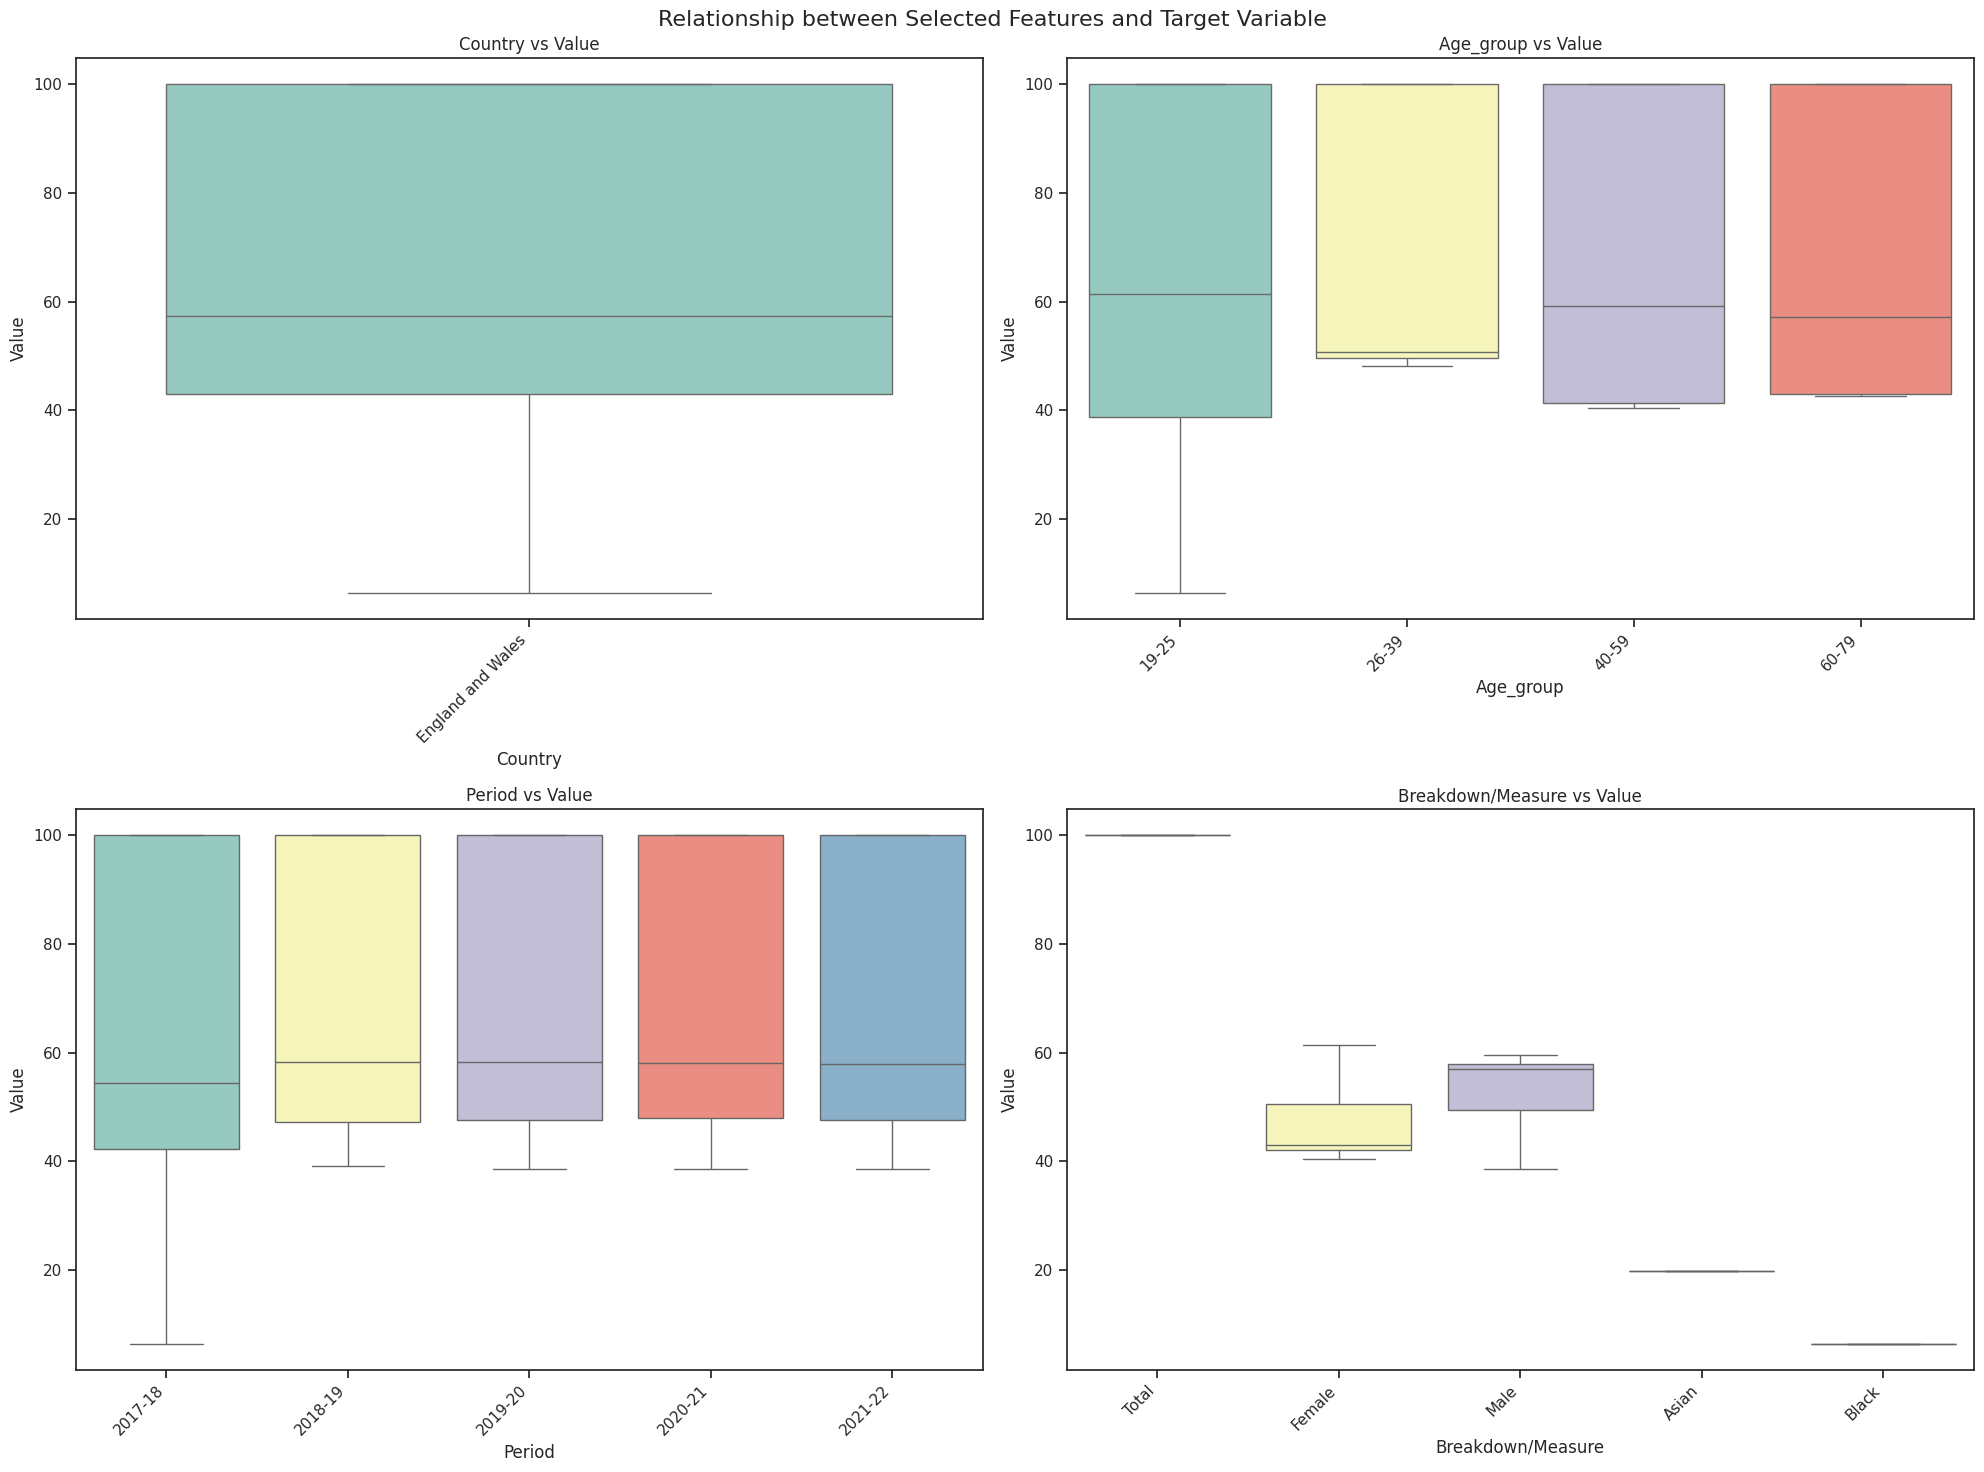

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error,r2_score

# Load and prepare the data
data = pd.read_csv('NDA Young People with Type 2 Diabetes 2021-22 - Open Data v1.0.csv')
data_subset = data.iloc[57:117]

#   Select features and target variable
features = ['Section', 'Table/Figure', 'Title', 'Period', 'Country', 'Age_group', 'Breakdown/Measure', 'Data_type']
target = 'Value'

X = data_subset[features]
y = data_subset[target]

#   Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True, color='skyblue')
plt.title('Distribution of Target Variable (Value)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

#   Preprocess data and define the model pipeline
categorical_features = features
numerical_features = []

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('imputer', SimpleImputer(strategy='mean')),
    ('regressor', MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42))
])

#   Perform cross-validation and print results
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
cv_scores = -cv_scores
print("Cross-Validation MAE Scores:", cv_scores)
ML_regressor = cv_scores.mean()
print("Mean CV MAE:", ML_regressor)
ML_regressor_r2 = r2_score(y_test, y_pred)
print("R2 score:", ML_regressor_r2)

#   Visualize cross-validation results
plt.figure(figsize=(10, 6))
sns.boxplot(x=cv_scores, color='lightgreen')
plt.title('Cross-Validation MAE Scores')
plt.xlabel('Mean Absolute Error')
plt.show()

#   Analyze feature importance (for categorical features)
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_features = encoder.fit_transform(X)
feature_names = encoder.get_feature_names_out(features)

plt.figure(figsize=(12, 8))
sns.barplot(x=np.sum(encoded_features.toarray(), axis=0), y=feature_names, palette='viridis')
plt.title('Feature Importance (Based on Frequency)')
plt.xlabel('Frequency')
plt.ylabel('Features')
plt.show()

#   Visualize relationships between features and target
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('Relationship between Selected Features and Target Variable', fontsize=16)

for i, feature in enumerate(['Country', 'Age_group', 'Period', 'Breakdown/Measure']):
    ax = axes[i // 2, i % 2]
    sns.boxplot(x=feature, y=target, data=data_subset, ax=ax, palette='Set3')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_title(f'{feature} vs {target}')

plt.tight_layout()
plt.show()

# **Decision Tree Regressor**

This algorithm analyses a dataset pertaining to type 2 diabetes cases in great detail. First, it uses a heatmap of encoded data to visualise correlations between category features. After that, a pipeline containing a `DecisionTreeRegressor} is set up, the model's performance is assessed using cross-validation, and the distribution of Mean Absolute Error (MAE) scores is plotted. Permutation importance is used to determine the significance of each feature, and a bar plot is used to show the findings. Violin plots are used to visualise the target variable's distribution across various category characteristics. Plotting actual values versus prediction errors, coloured by nation, is the last method used to analyse prediction mistakes.

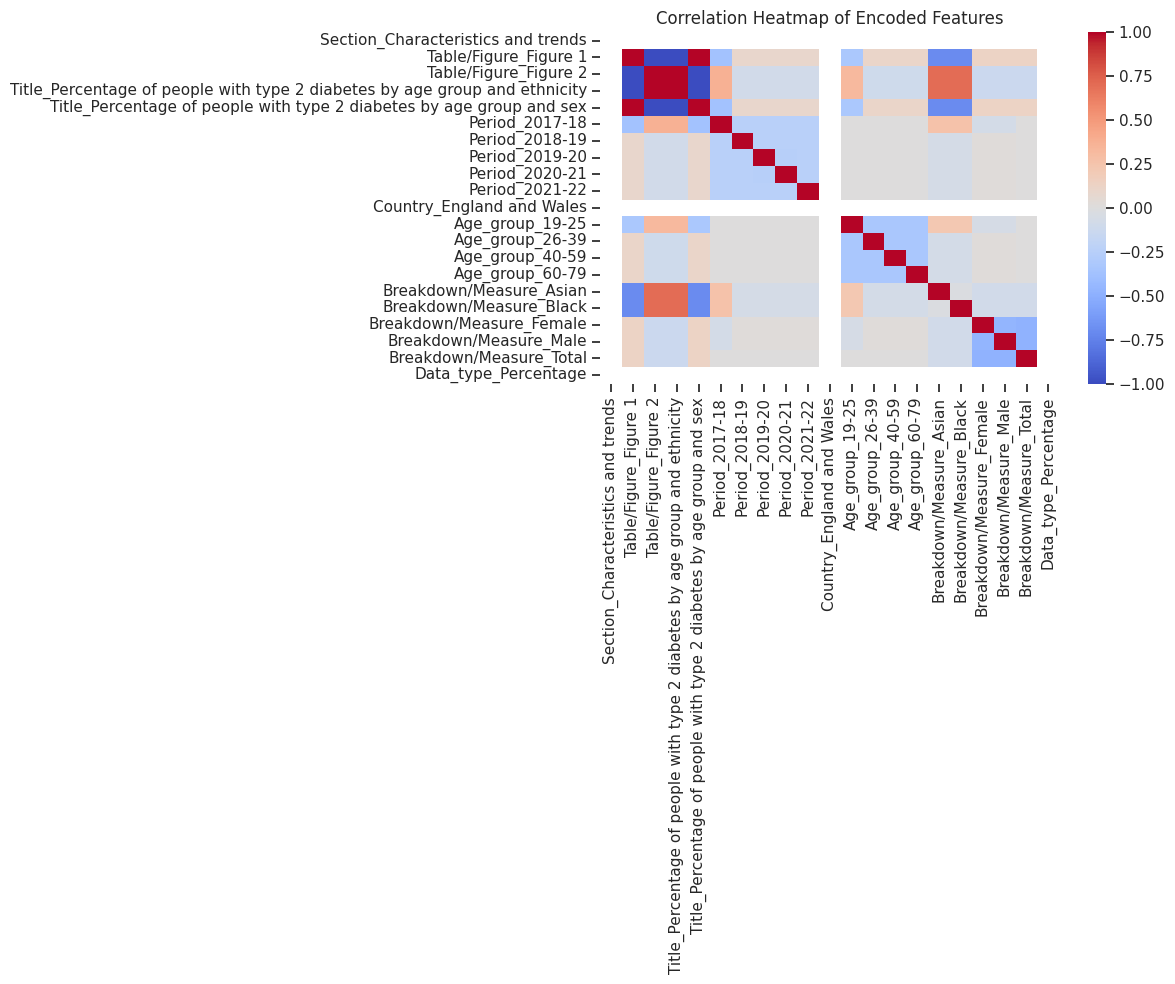

Decision Tree Regressor Cross-Validation MAE Scores: [12.28333333  1.13333333  0.65833333  0.31666667  8.15833333]
Mean CV MAE: 4.51
R2 score: 0.1508732188767199


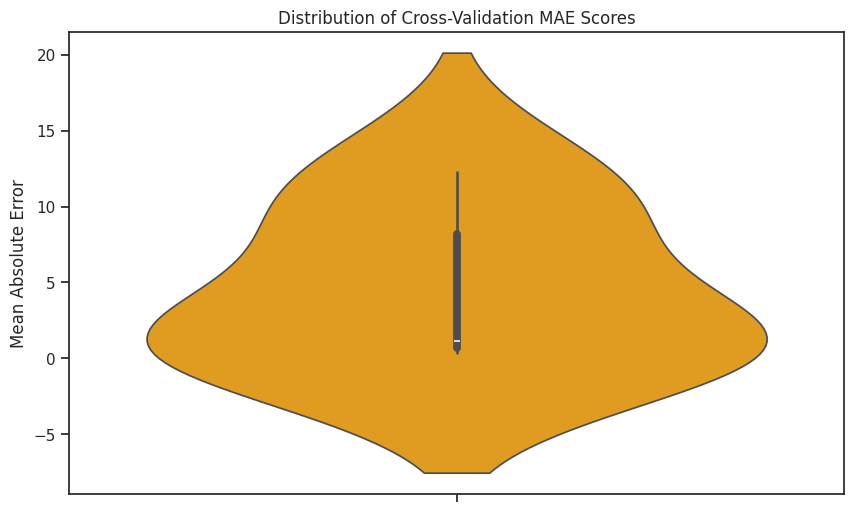

<ipython-input-96-9e13885b826d>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importance, y=sorted_features, palette='YlOrRd')


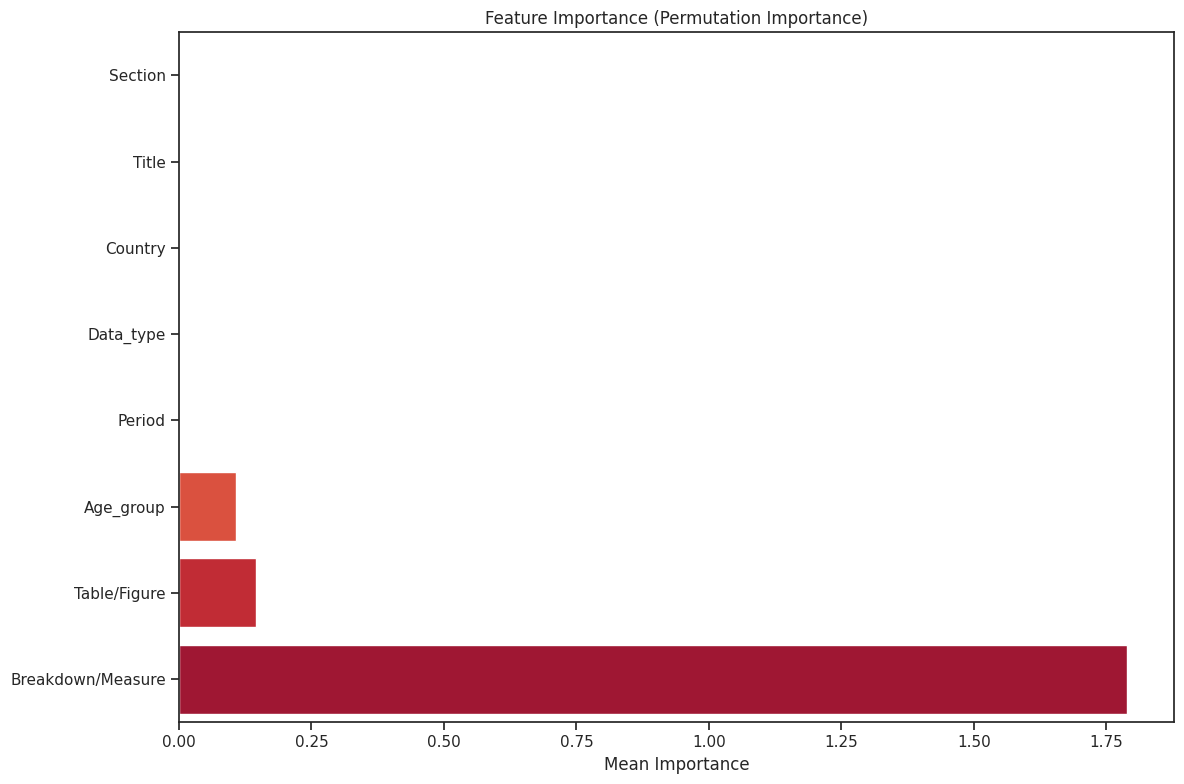

<ipython-input-96-9e13885b826d>:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=feature, y=target, data=data_subset, ax=ax, palette='Set2')
<ipython-input-96-9e13885b826d>:80: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-96-9e13885b826d>:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=feature, y=target, data=data_subset, ax=ax, palette='Set2')
<ipython-input-96-9e13885b826d>:80: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-96-9e13885b826d>:79: FutureWarn

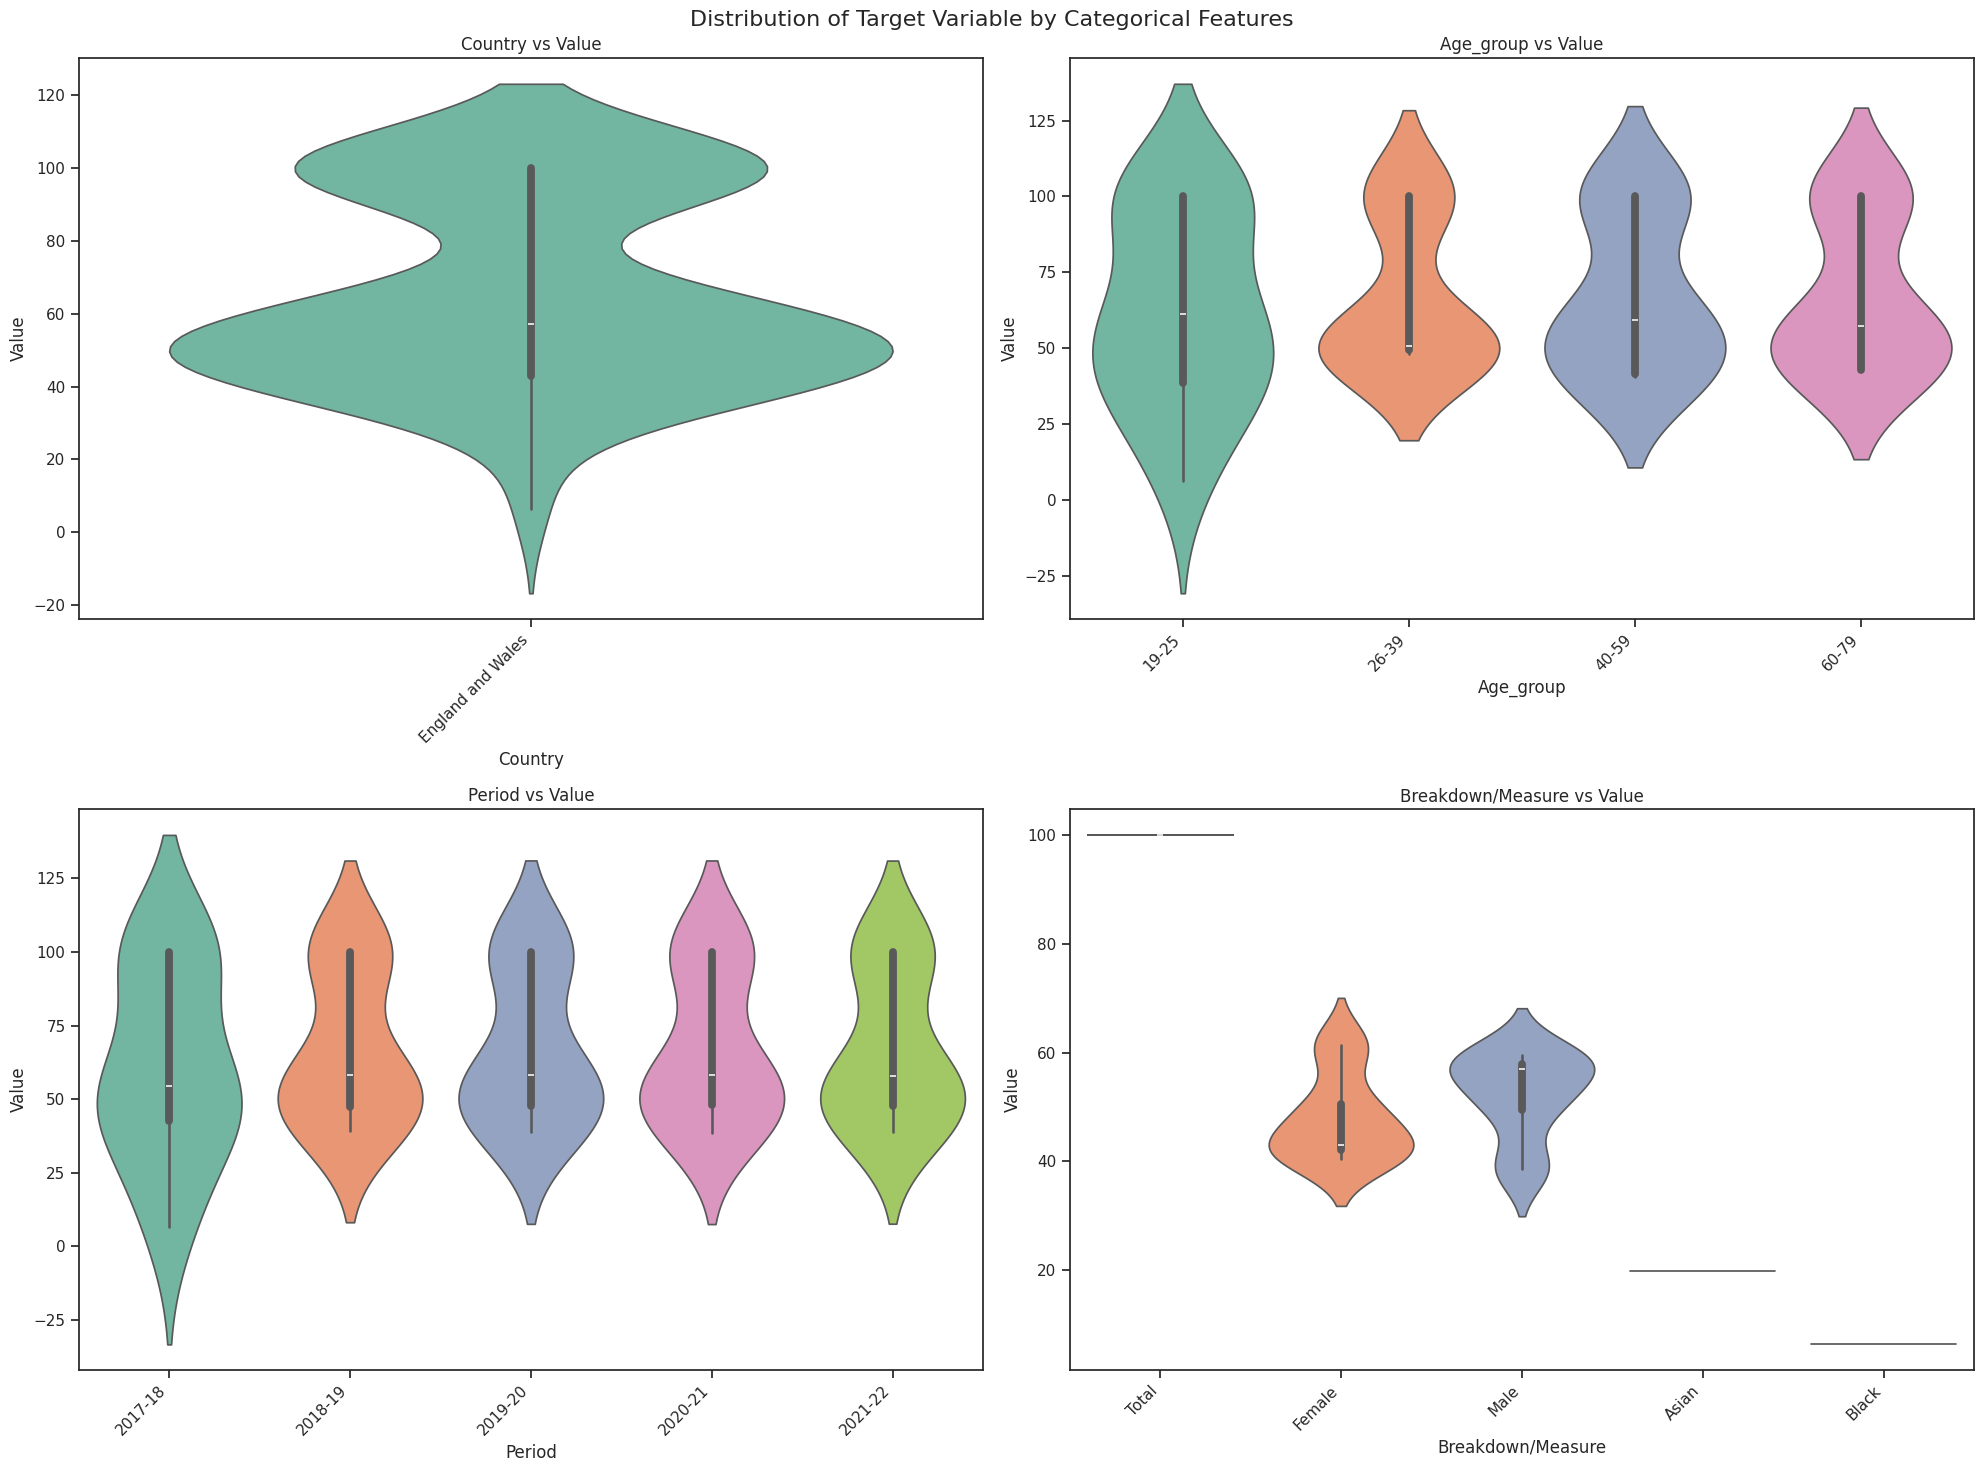

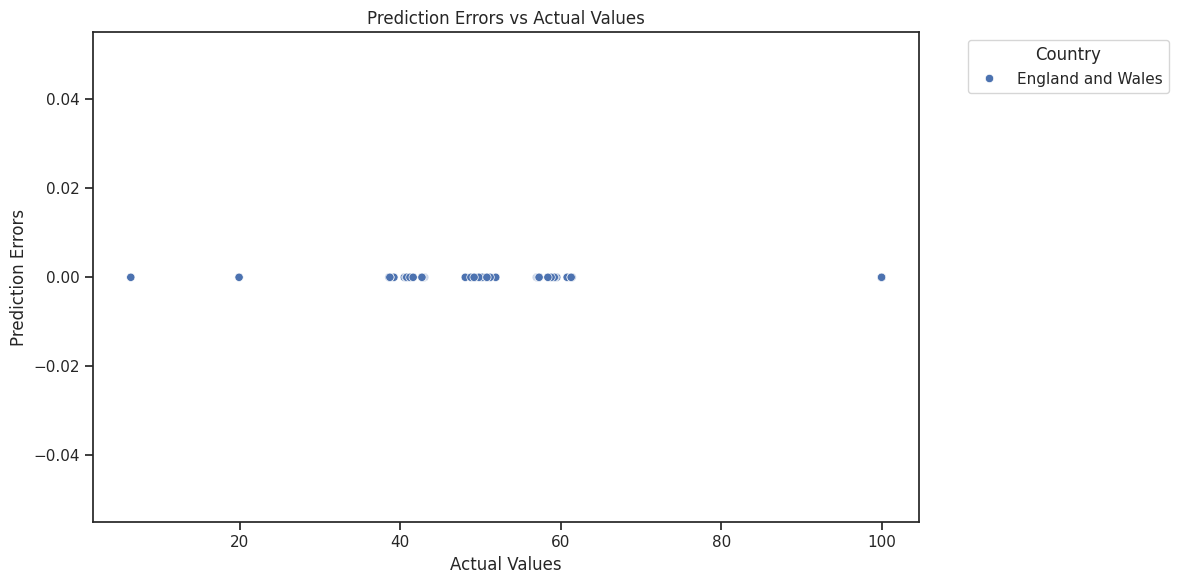

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.inspection import permutation_importance

#   Load and prepare the data
data = pd.read_csv('NDA Young People with Type 2 Diabetes 2021-22 - Open Data v1.0.csv')
data_subset = data.iloc[57:117]

features = ['Section', 'Table/Figure', 'Title', 'Period', 'Country', 'Age_group', 'Breakdown/Measure', 'Data_type']
target = 'Value'

X = data_subset[features]
y = data_subset[target]

#   Create a correlation heatmap for categorical features
plt.figure(figsize=(12, 10))
sns.heatmap(pd.get_dummies(X).corr(), annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Encoded Features')
plt.tight_layout()
plt.show()

#   Preprocess data and define the model pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), features)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('imputer', SimpleImputer(strategy='mean')),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

#   Perform cross-validation and visualize results
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
cv_scores = -cv_scores
print("Decision Tree Regressor Cross-Validation MAE Scores:", cv_scores)
DTR_mae = cv_scores.mean()
print("Mean CV MAE:", DTR_mae)
DTR_r2 = r2_score(y_test, y_pred)
print("R2 score:", DTR_r2)

plt.figure(figsize=(10, 6))
sns.violinplot(y=cv_scores, color='orange')
plt.title('Distribution of Cross-Validation MAE Scores')
plt.ylabel('Mean Absolute Error')
plt.show()

# Train the model and analyze feature importance
model.fit(X, y)
feature_importance = permutation_importance(model, X, y, n_repeats=10, random_state=42)

sorted_idx = feature_importance.importances_mean.argsort()
sorted_features = [features[i] for i in sorted_idx]
sorted_importance = feature_importance.importances_mean[sorted_idx]

plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_importance, y=sorted_features, palette='YlOrRd')
plt.title('Feature Importance (Permutation Importance)')
plt.xlabel('Mean Importance')
plt.tight_layout()
plt.show()

#   Visualize the distribution of target variable by categorical features
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
fig.suptitle('Distribution of Target Variable by Categorical Features', fontsize=16)

for i, feature in enumerate(['Country', 'Age_group', 'Period', 'Breakdown/Measure']):
    ax = axes[i // 2, i % 2]
    sns.violinplot(x=feature, y=target, data=data_subset, ax=ax, palette='Set2')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_title(f'{feature} vs {target}')

plt.tight_layout()
plt.show()

#   Analyze prediction errors
y_pred = model.predict(X)
errors = y - y_pred

plt.figure(figsize=(12, 6))
sns.scatterplot(x=y, y=errors, hue=data_subset['Country'], palette='deep')
plt.title('Prediction Errors vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Prediction Errors')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# **Random Forest Regressor**

The evaluation and visualisation of a Random Forest Regressor model for type 2 diabetes case prediction is the main goal of this script. It divides the dataset into training and testing sets after loading and prepping it. In order to comprehend the target variable's spread, the script first uses a density plot to visualise the variable's distribution. After that, it configures a pipeline for modelling and data preparation, runs cross-validation to determine the Mean Absolute Error (MAE) of the model, and uses a swarm plot to display the results. After the model has been trained, the characteristics' relative relevance is examined and shown graphically via a bar plot that highlights the top ten features. The script computes and outputs the normalised accuracy and R-squared score, and then analyses the prediction errors using a residual plot. Lastly, a scatter plot that illustrates the relationship between several characteristics (Age Group, Country, and Period) and the target variable is used to visualise feature interactions.

<ipython-input-97-365cec4e70b2>:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=y, shade=True, color='purple')


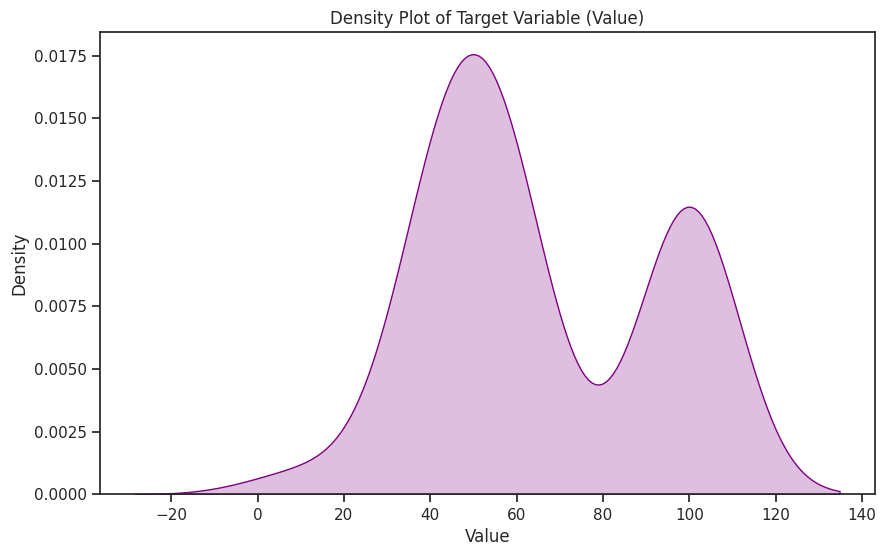

Random Forest Regressor Cross-Validation MAE Scores: [12.45758333  0.71475     2.02983333  1.41233333  7.69291667]
Mean CV MAE: 4.861483333333323


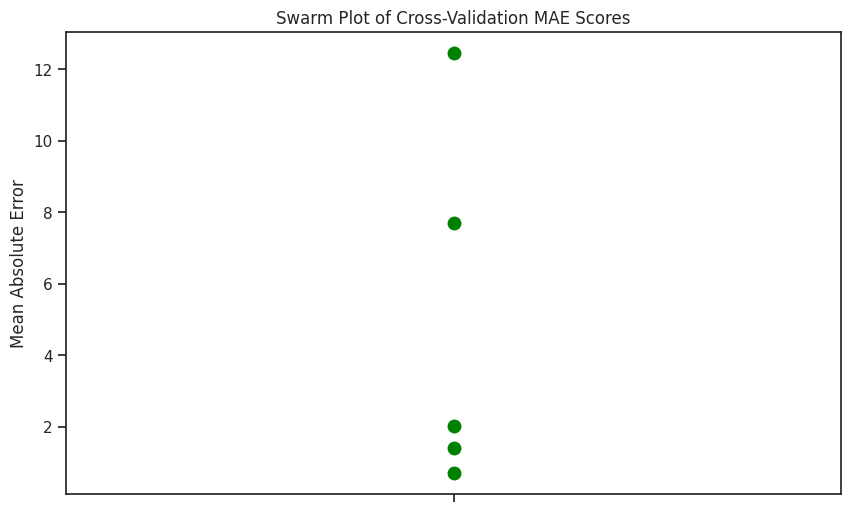

<ipython-input-97-365cec4e70b2>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=importance_df, palette='viridis')


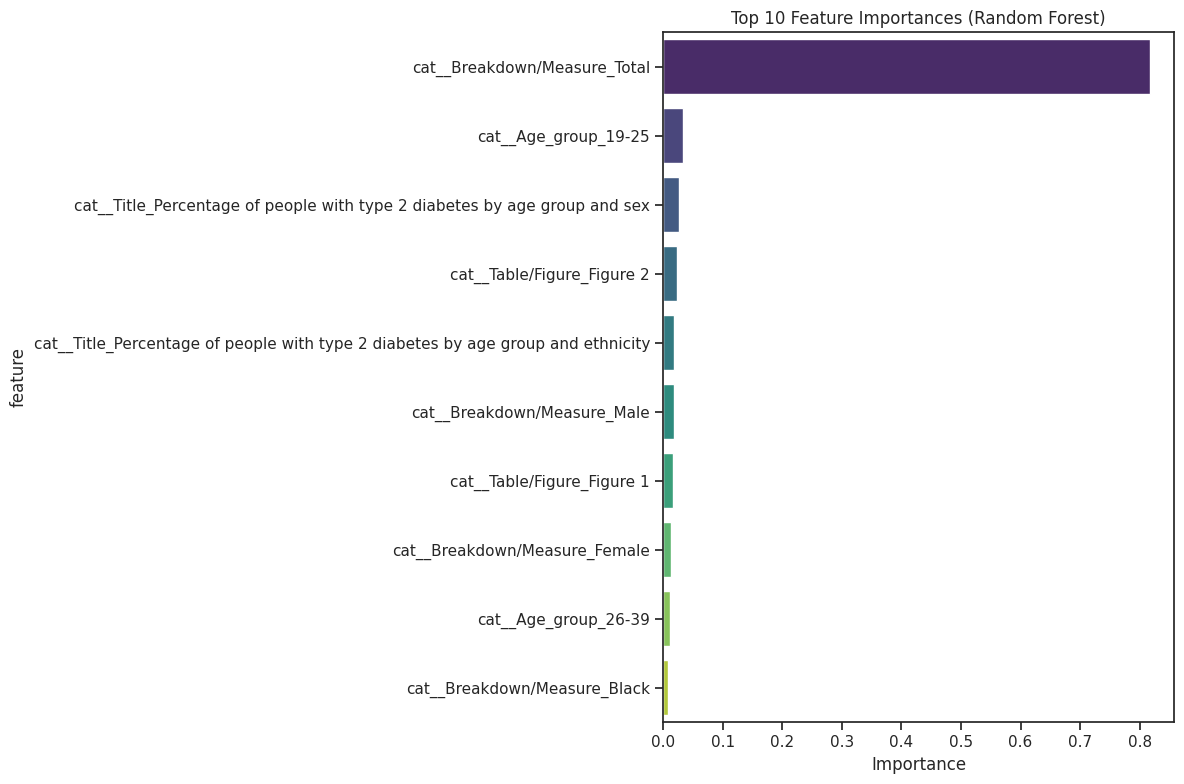

Normalized accuracy: 0.9923
R2 score: 0.9985655748693039


/usr/local/lib/python3.10/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


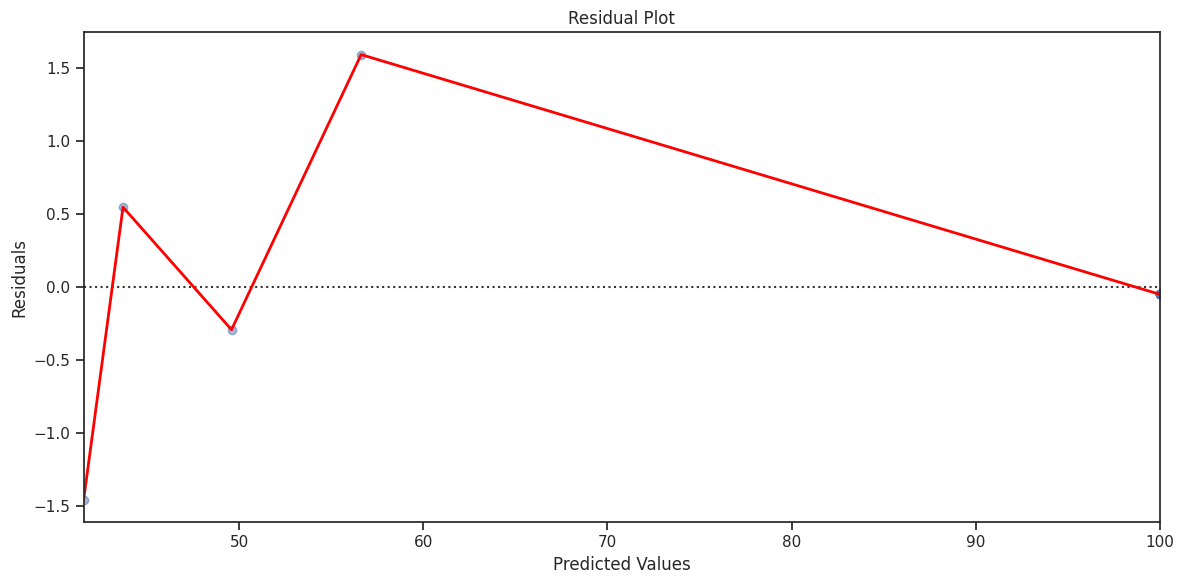

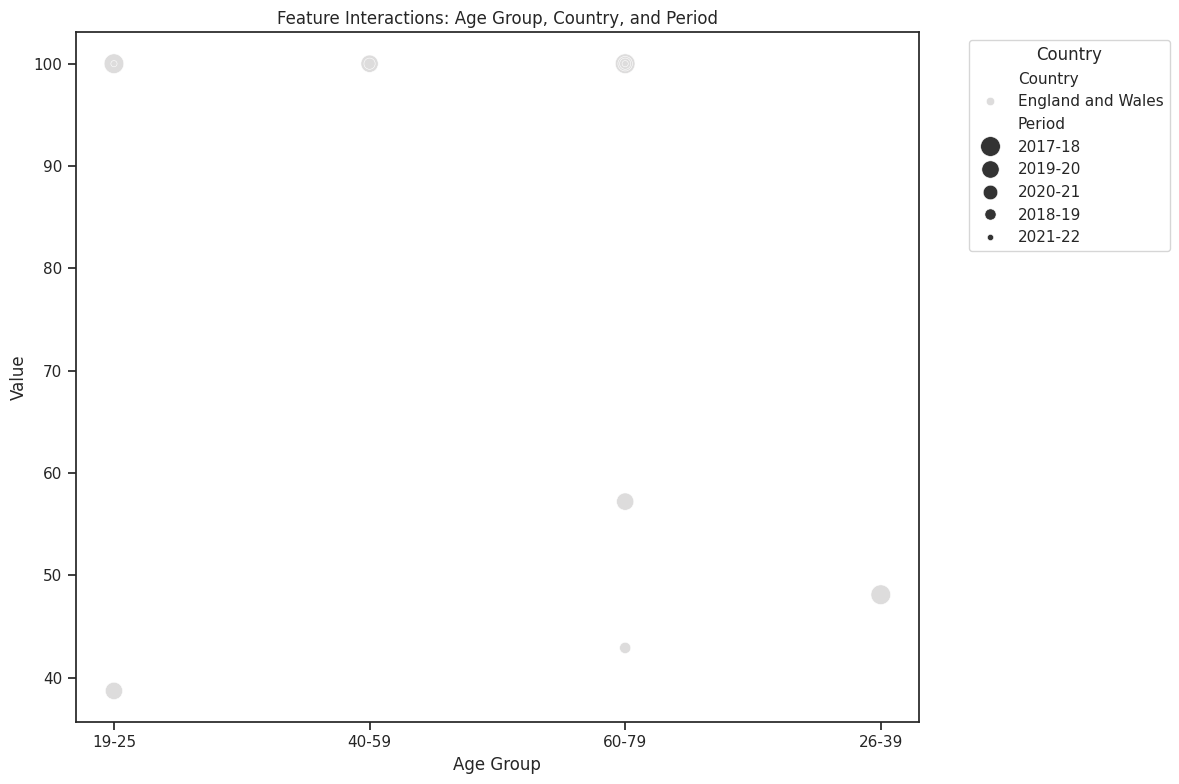

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Load and prepare the data
data = pd.read_csv('NDA Young People with Type 2 Diabetes 2021-22 - Open Data v1.0.csv')
data_subset = data.iloc[57:117]

features = ['Section', 'Table/Figure', 'Title', 'Period', 'Country', 'Age_group', 'Breakdown/Measure', 'Data_type']
target = 'Value'

X = data_subset[features]
y = data_subset[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualize the distribution of the target variable with a density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=y, shade=True, color='purple')
plt.title('Density Plot of Target Variable (Value)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

# Preprocess data and define the model pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), features)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('imputer', SimpleImputer(strategy='mean')),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Perform cross-validation and visualize results
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
cv_scores = -cv_scores
print("Random Forest Regressor Cross-Validation MAE Scores:", cv_scores)
RFR_mae = cv_scores.mean()
print("Mean CV MAE:", RFR_mae)

plt.figure(figsize=(10, 6))
sns.swarmplot(y=cv_scores, color='green', size=10)
plt.title('Swarm Plot of Cross-Validation MAE Scores')
plt.ylabel('Mean Absolute Error')
plt.show()

# Train the model and analyze feature importance
model.fit(X_train, y_train)
feature_importance = model.named_steps['regressor'].feature_importances_
feature_names = model.named_steps['preprocessor'].get_feature_names_out()

importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance})
importance_df = importance_df.sort_values('importance', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=importance_df, palette='viridis')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

# Analyze prediction errors with residual plot
y_pred = model.predict(X_test)
residuals = y_test - y_pred
Random_forest_mae = mean_absolute_error(y_test, y_pred)
y_range = y_test.max() - y_test.min()
normalized_accuracy = 1 - (Random_forest_mae / y_range)
print(f"Normalized accuracy: {normalized_accuracy:.4f}")

RFR_r2 = r2_score(y_test, y_pred)
print("R2 score:", RFR_r2)

plt.figure(figsize=(12, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 2})
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()

# Visualize feature interactions
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x=X_test['Age_group'], y=y_test, hue=X_test['Country'], size=X_test['Period'], sizes=(20, 200), palette='coolwarm', ax=ax)
plt.title('Feature Interactions: Age Group, Country, and Period')
plt.xlabel('Age Group')
plt.ylabel('Value')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# **Logistic Regression Regressor**

The purpose of this investigation is to apply a logistic regression model to predict the prevalence of type 2 diabetes in young individuals. Categorical variables are encoded and the target variable is transformed to a binary format following the loading and preprocessing of the dataset. Before fitting the model, a pipeline is built to handle feature scaling and imputation. A thorough classification report and an accuracy score are obtained from the model's evaluation. Furthermore, a trend analysis is carried out, displaying the annual variations in diabetes cases as a line plot and emphasising the general trend and rise from 2017–18 to 2021–22.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Section            974 non-null    object 
 1   Table/Figure       935 non-null    object 
 2   Title              974 non-null    object 
 3   Period             974 non-null    object 
 4   Country            974 non-null    object 
 5   Age_group          974 non-null    object 
 6   Breakdown/Measure  919 non-null    object 
 7   Data_type          974 non-null    object 
 8   Value              974 non-null    float64
 9   Value_Denominator  781 non-null    float64
 10  Value_Numerator    781 non-null    float64
dtypes: float64(3), object(8)
memory usage: 83.8+ KB
None

First few rows of the data:
                      Section Table/Figure  \
0  Characteristics and trends      Table 1   
1  Characteristics and trends      Table 1   
2  Characteristics and trends      Table 1   


<ipython-input-98-50e6853944fc>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['Period'] = data_subset['Period'].astype(str)
<ipython-input-98-50e6853944fc>:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['Year'] = data_subset['Period'].str[:4].astype(int)
<ipython-input-98-50e6853944fc>:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

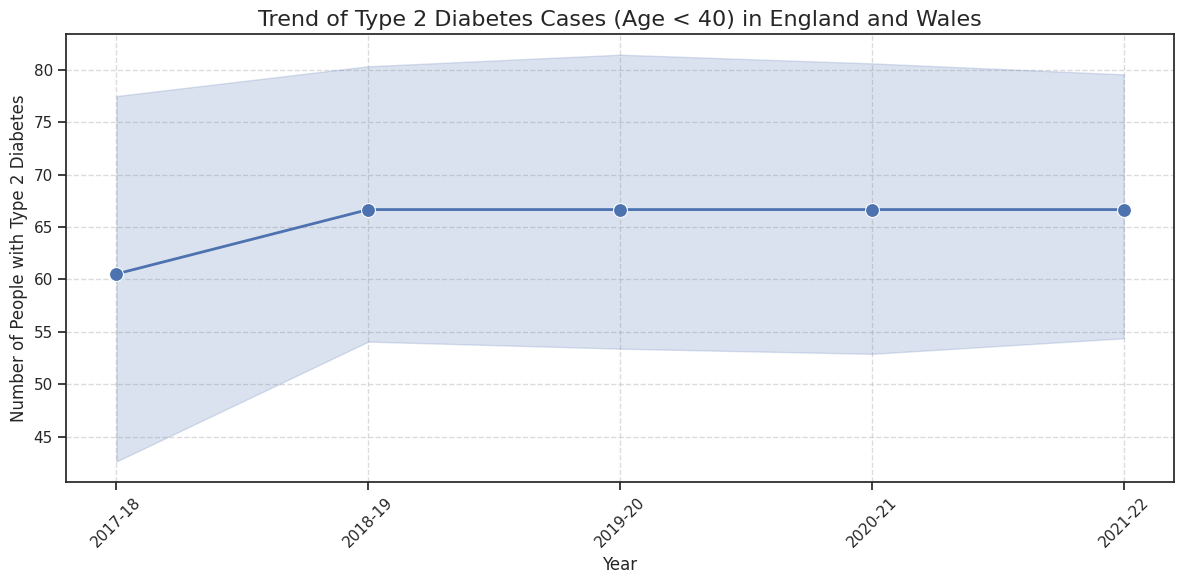

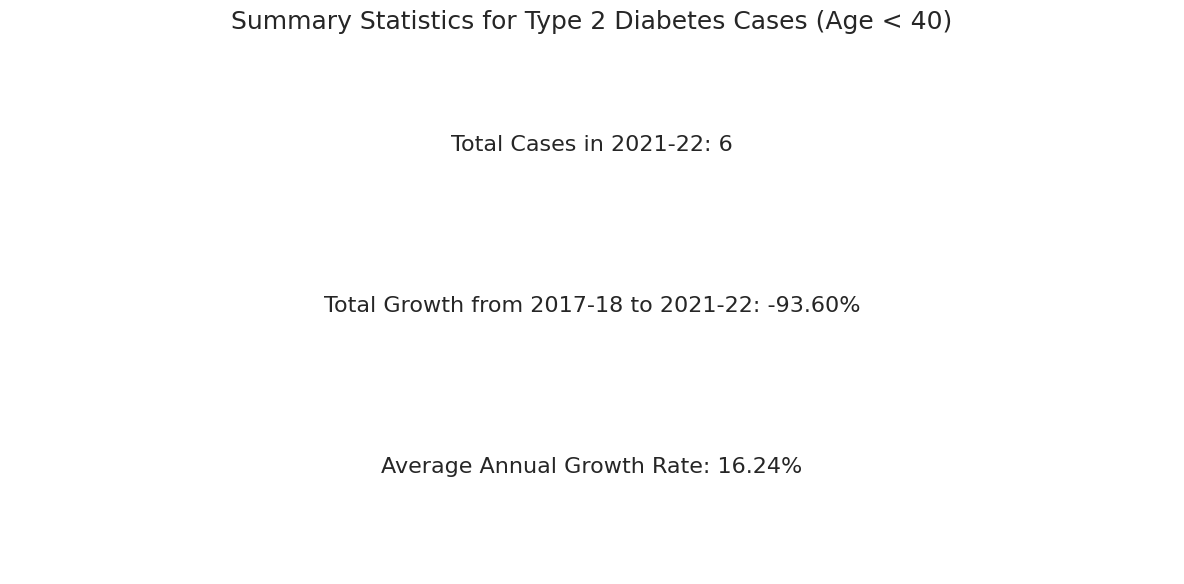

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
file_path = 'NDA Young People with Type 2 Diabetes 2021-22 - Open Data v1.0.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
print(data.info())
print("\nFirst few rows of the data:")
print(data.head())

# Extract relevant portion of the dataset (rows 57 to 116)
data_subset = data.iloc[57:117]

# Display the first few rows of the subset
print(data_subset.head())

# Selecting features and target variable
features = ['Section', 'Table/Figure', 'Title', 'Period', 'Country', 'Age_group', 'Breakdown/Measure', 'Data_type']
target = 'Value'

# Splitting the data into features and target
X = data_subset[features]
y = data_subset[target]

# Convert the target variable to binary for logistic regression
y_binary = (y > y.median()).astype(int)

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

# Define the model
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
Logistoc_regression_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Convert the Period column to string
data_subset['Period'] = data_subset['Period'].astype(str)

# Calculate year-over-year growth
data_subset['Year'] = data_subset['Period'].str[:4].astype(int)
data_subset['Growth'] = data_subset['Value'].pct_change() * 100

# Calculate total growth from 2017-18 to 2021-22
total_growth = (data_subset['Value'].iloc[-1] - data_subset['Value'].iloc[0]) / data_subset['Value'].iloc[0] * 100

# Create a line plot to show the trend of type 2 diabetes cases over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Period', y='Value', data=data_subset, marker='o', linewidth=2, markersize=10)
plt.title('Trend of Type 2 Diabetes Cases (Age < 40) in England and Wales', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of People with Type 2 Diabetes', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Create a summary statistics visualization
plt.figure(figsize=(12, 6))
plt.text(0.5, 0.8, f"Total Cases in 2021-22: {data_subset['Value'].iloc[-1]:,.0f}",
         horizontalalignment='center', verticalalignment='center', fontsize=16)
plt.text(0.5, 0.5, f"Total Growth from 2017-18 to 2021-22: {total_growth:.2f}%",
         horizontalalignment='center', verticalalignment='center', fontsize=16)
plt.text(0.5, 0.2, f"Average Annual Growth Rate: {data_subset['Growth'].mean():.2f}%",
         horizontalalignment='center', verticalalignment='center', fontsize=16)
plt.axis('off')
plt.title('Summary Statistics for Type 2 Diabetes Cases (Age < 40)', fontsize=18)
plt.tight_layout()
plt.show()

# **ENSEMBLE- RandomForest,GradientBoost,XGBOOST**

In order to forecast the prevalence of type 2 diabetes, this research uses an ensemble strategy that combines XGBoost, Gradient Boosting, and Random Forest regressors. The models are integrated into a voting regression after one-hot encoding is used to preprocess the data and impute missing values. The ensemble model performs well, showing strong predictive capacity with a low mean absolute error (MAE) and a high R-squared score. Two types of visualisations are provided: a bar plot that highlights the top 10 features according to the Random Forest model's feature relevance, and a scatter plot that compares actual values with projected values. This method improves prediction accuracy by utilising the advantages of several different algorithms.

Mean Absolute Error: 0.4248
R-squared Score: 0.9992


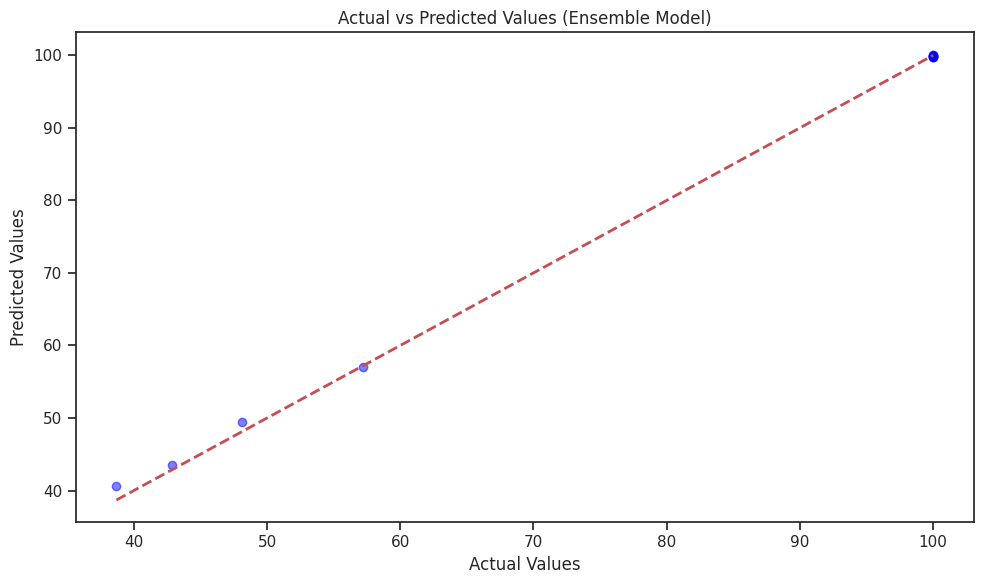

<ipython-input-99-cc32088f5393>:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=importance_df, palette='viridis')


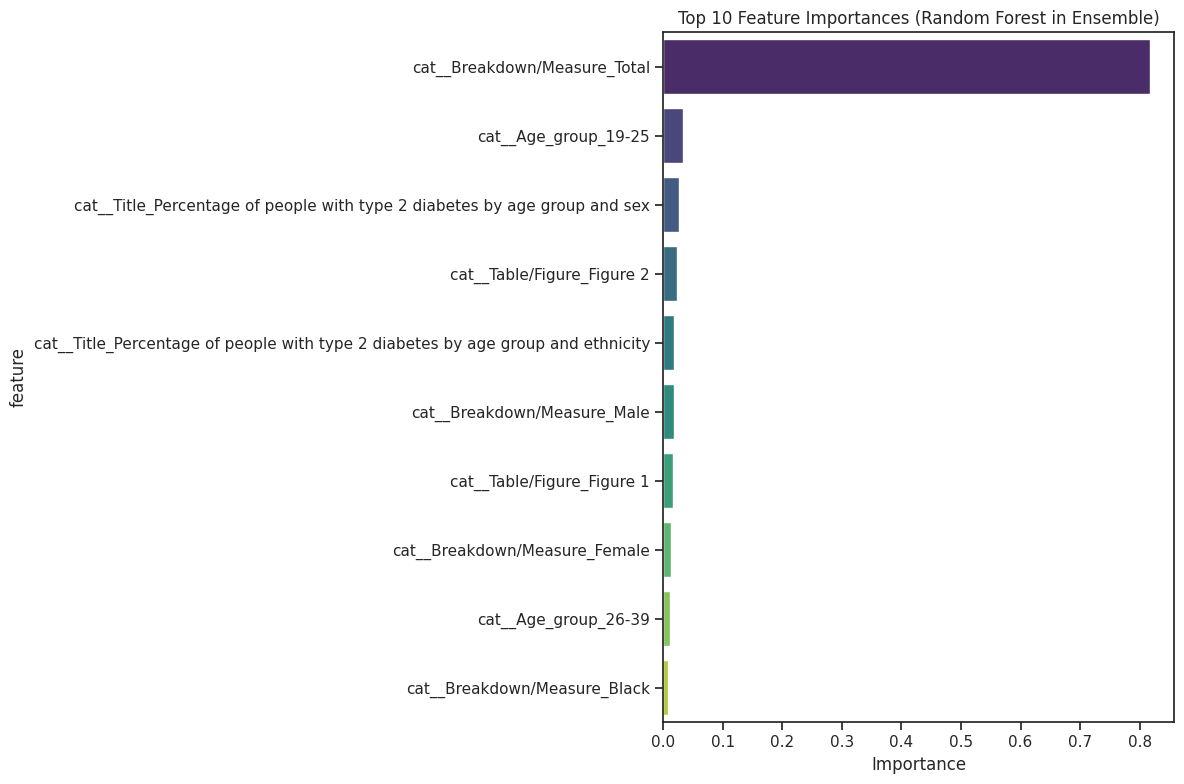

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor

# Load and prepare the data
data = pd.read_csv('NDA Young People with Type 2 Diabetes 2021-22 - Open Data v1.0.csv')
data_subset = data.iloc[57:117]

features = ['Section', 'Table/Figure', 'Title', 'Period', 'Country', 'Age_group', 'Breakdown/Measure', 'Data_type']
target = 'Value'

X = data_subset[features]
y = data_subset[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), features)
    ])

# Define the base models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

# Create the ensemble model
ensemble_model = VotingRegressor(
    estimators=[
        ('rf', rf_model),
        ('gb', gb_model),
        ('xgb', xgb_model)
    ]
)

# Create the full pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('imputer', SimpleImputer(strategy='mean')),
    ('regressor', ensemble_model)
])

# Fit the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print the performance metrics
mae = mean_absolute_error(y_test, y_pred)
xg_boost_r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.4f}")
print(f"R-squared Score: {xg_boost_r2:.4f}")

# Visualize the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Ensemble Model)')
plt.tight_layout()
plt.show()

# Feature importance (using Random Forest as an example)
rf_model = model.named_steps['regressor'].estimators_[0]
feature_importance = rf_model.feature_importances_
feature_names = model.named_steps['preprocessor'].get_feature_names_out()

importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance})
importance_df = importance_df.sort_values('importance', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=importance_df, palette='viridis')
plt.title('Top 10 Feature Importances (Random Forest in Ensemble)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

# **ALL MODELS SCORE COMPARISION**

The command `pip install dash` is used to install Dash, a robust framework for Python interactive web applications. Your data visualisations will have dynamic and responsive web interfaces thanks to the setup of Dash and its dependencies that follows. To use the command "!pip install dash," just add an exclamation point before it if you're working in a Jupyter notebook. With Dash, creating interactive data apps will be simple once it's installed.

In [100]:
!pip install dash

An interactive dashboard for displaying the effectiveness of several machine learning models is offered by this Dash application. It has a bar chart with the highest score highlighted in red that compares the R2 scores of several models. A text element on the dashboard indicates which model is performing the best according to the R2 score. To make sure that the most pertinent data on model performance is presented in an understandable and transparent manner, the program makes advantage of real-time updates.

In [101]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd
import numpy as np

# Initial data
data = {
    'Model': ['ML Regressor(Neural Network)', 'SVM', 'Decision Tree Regressor', 'Random Forest Regressor', 'Ensemble','Logistoc Regression'],
    'R2 Score': [ML_regressor_r2, SVM_r2, DTR_r2, RFR_r2, xg_boost_r2,Logistoc_regression_accuracy]
}

df = pd.DataFrame(data)

# Function to determine the color for each bar
def get_color(score, max_score):
    return 'rgb(255,0,0)' if score == max_score else 'rgb(0,116,217)'

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Model R2 Score Dashboard"),
    dcc.Graph(id='accuracy-graph'),
    html.Div(id='best-model-text')
])

@app.callback(
    [Output('accuracy-graph', 'figure'),
     Output('best-model-text', 'children')],
    Input('accuracy-graph', 'id')
)
def update_graph(_):
    max_score = df['R2 Score'].max()
    df['Color'] = df['R2 Score'].apply(lambda x: get_color(x, max_score))
    best_model = df.loc[df['R2 Score'] == max_score, 'Model'].values[0]

    fig = px.bar(df, x='Model', y='R2 Score', title='Model Performance (R2 Score)', color='Color', color_discrete_map="identity")
    fig.update_layout(yaxis_title='R2 Score', showlegend=False)

    best_model_text = f"Best performing model: {best_model} (R2 Score: {max_score:.4f})"

    return fig, best_model_text

if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>